In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)  

In [2]:
# Load dataset
df = pd.read_csv('C:/Users/User/Desktop/malaysia_salary_prediction/jobstreet_all_job_dataset.csv')

df.head()

,job_id,job_title,company,descriptions,location,category,subcategory,role,type,salary,listingDate
0,74630583.0,Procurement Executive (Contract),Coca-Cola Bottlers (Malaysia) Sdn Bhd,Position Purpose\nManage aspects of procuremen...,Negeri Sembilan,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",procurement-executive,Contract/Temp,NaN,2024-03-21T05:58:35Z
1,74660602.0,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Petaling,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z
2,74655679.0,"Data Analyst - Asset Management, SPX Express",Shopee Mobile Malaysia Sdn Bhd,Performs detailed data analysis on existing sp...,Klang District,"Manufacturing, Transport & Logistics",Analysis & Reporting,asset-management-analyst,Full time,NaN,2024-03-22T04:22:43Z
3,74657624.0,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Petaling,Engineering,Electrical/Electronic Engineering,services-engineer,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z
4,74679363.0,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Hulu Langat,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z


In [3]:
df.shape

(69024, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69024 entries, 0 to 69023
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_id        69024 non-null  float64
 1   job_title     69024 non-null  object 
 2   company       69024 non-null  object 
 3   descriptions  69024 non-null  object 
 4   location      69024 non-null  object 
 5   category      69024 non-null  object 
 6   subcategory   69024 non-null  object 
 7   role          66772 non-null  object 
 8   type          69024 non-null  object 
 9   salary        31594 non-null  object 
 10  listingDate   69024 non-null  object 
dtypes: float64(1), object(10)
memory usage: 5.8+ MB


In [5]:
df.describe(include='all')

,job_id,job_title,company,descriptions,location,category,subcategory,role,type,salary,listingDate
count,6.902400e+04,69024,69024,69024,69024,69024,69024,66772,69024,31594,69024
unique,NaN,40417,20670,63842,647,30,310,5484,11,2083,60433
top,NaN,Account Executive,Private Advertiser,Description\n• Have a valid driving license.\n...,Kuala Lumpur,Accounting,Administrative Assistants,account-executive,Full time,"RM 3,000 – RM 4,500 per month",2024-03-18T21:04:00Z
freq,NaN,664,2230,54,15390,11308,4655,1483,53790,1750,238
mean,7.614520e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.014281e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.134223e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.439537e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.499362e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.627486e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum().sort_values(ascending=False)


salary          37430
role             2252
job_id              0
company             0
job_title           0
descriptions        0
location            0
subcategory         0
category            0
type                0
listingDate         0
dtype: int64

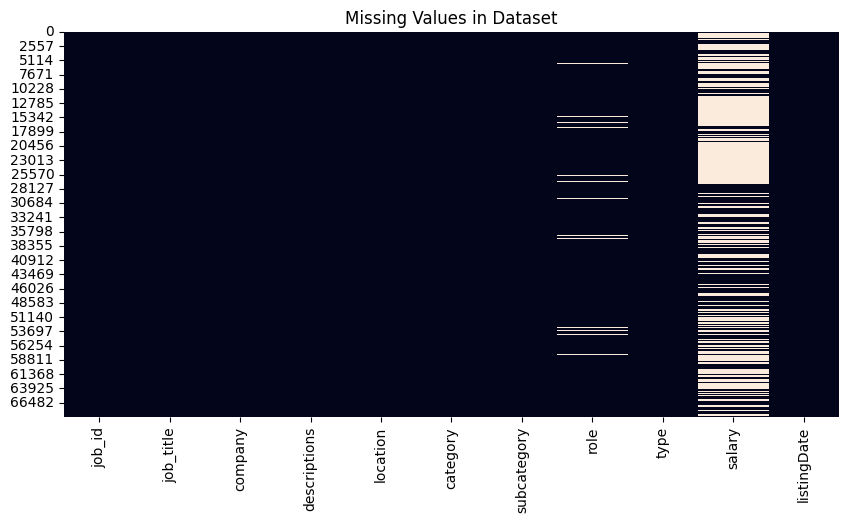

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

# =========================================================================
1 Imports and Configuration
# =========================================================================

In [8]:
import pandas as pd
import numpy as np
import re

# Disables the SettingWithCopyWarning globally
pd.options.mode.chained_assignment = None 

# --- GLOBAL CONSTANTS ---
TITLE_MAPPING = {
    # --- INFORMATION TECHNOLOGY CORE ---
    '.net programmer': 'NET Programmer',
    'software developer': 'Software Developer', 'software programmer': 'Software Developer',
    'web developer': 'Web Developer', 'front end software development': 'Front End Developer',
    'full stack': 'Full Stack Developer',
    'vision software': 'Vision Software Engineer', 'software support': 'Software Support Consultant',
    'software consultant': 'Software Consultant', 'cyber security': 'Cyber Security Specialist',
    'cybersecurity': 'Cyber Security Specialist', 'devsecops security architect': 'DevSecOps Architect',
    'identity access management': 'Identity Access Management Analyst',
    'information security': 'Information Security Specialist',
    'network security': 'Network Security Engineer', 'solution architect': 'Solution Architect',
    'servicenow architect': 'ServiceNow Architect', 'data analyst': 'Data Analyst',
    'data scientist': 'Data Scientist', 'software tester': 'Software Tester',
    'software automation tester': 'Software Automation Tester', 'digital asic designer': 'Digital ASIC Designer',
    'ai software development': 'AI/Software Developer', 'php programmer': 'PHP Programmer',
    'flutter programmer': 'Flutter Programmer', 'java programmer': 'Java Programmer',
    'dba': 'Database Administrator', 'devops': 'DevOps Engineer', 'noc': 'NOC Engineer',
    'it support': 'IT Support', 'help desk': 'Helpdesk Support', 'infrastructure support': 'Infrastructure Support',
    'network': 'Network Engineer', 'linux server enginner': 'Linux Server Engineer',
    'mobile development': 'Mobile Developer', 'erp programmer': 'ERP Programmer',
    'automation tester': 'Automation Tester',
    
    # --- DESIGN & MEDIA ---
    'graphic designer': 'Graphic Designer', 'creative designer': 'Creative Designer',
    'designer': 'Creative Designer', 'content creator': 'Content Creator',
    'copywriter': 'Copywriter', 'seo content writer': 'SEO Content Writer', 'writer': 'Writer',
    'editor': 'Editor', 'video editor': 'Video Editor', 'motion designer': 'Motion Designer',
    'multimedia designer': 'Multimedia Designer', '3d artist': '3D Artist', '2d artist': '2D Artist',
    '3d modeller': '3D Modeler', '2d game artist': '2D Game Artist', 'ux writer': 'UX Writer',
    'subtitle translator': 'Translator', 'minutes writter': 'Minutes Secretary',
    'photo retoucher': 'Photo Editor', 'dtp artist': 'DTP Artist', 'livestream host': 'Livestream Host',
    'live host': 'Livestream Host', 'livestream': 'Livestream Host', 'live stream host': 'Livestream Host',
    'content writer': 'Content Writer', 'bim modeller': 'BIM Modeller', 'bim modler': 'BIM Modeller',
    'content moderator': 'Content Moderator', 'gaming content moderator': 'Content Moderator',
    'videographer': 'Videographer', 'photographer': 'Photographer',
    'photographer videographer': 'Photographer/Videographer', 'female videographer': 'Photographer/Videographer',
    'toon boom animator': 'Animator', 'youtube animator': 'Animator',
    
    # --- SALES & BUSINESS DEVELOPMENT ---
    'sales': 'Sales Executive', 'marketing': 'Marketing Executive',
    'business development': 'Business Development Executive', 'dealer': 'Dealer',
    'loan advisor': 'Loan Advisor', 'mortgage advisor': 'Mortgage Advisor',
    'financial advisor': 'Financial Advisor', 'takaful advisor': 'Takaful Advisor',
    'unit trust consultant': 'Unit Trust Consultant', 'insurance agent': 'Insurance Agent',
    'insurance advisor': 'Insurance Advisor', 'ejen takaful': 'Takaful Agent',
    'cimb preferred relationship': 'Relationship Manager', 'relationship management': 'Relationship Manager',
    'business consultant': 'Business Consultant', 'investment consultant': 'Investment Consultant',
    'property agent': 'Real Estate Agent', 'perunding hartanah': 'Real Estate Agent',
    'affiliate management': 'Affiliate Manager', 'client advisor': 'Client Advisor',
    'customer acquisition': 'Customer Acquisition Specialist', 'franchise consultant': 'Franchise Consultant',
    'channel business': 'Channel Sales Executive', 'business division': 'Business Development Executive',

    # --- FINANCIAL SERVICES & RISK ---
    'actuarial': 'Actuarial Analyst', 'actuarial science': 'Actuarial Analyst',
    'credit control': 'Credit Controller', 'credit recovery': 'Credit Recovery Specialist',
    'debt collector': 'Debt Collector', 'debt recovery': 'Debt Recovery Specialist',
    'collection': 'Collection Officer', 'credit assessment': 'Credit Analyst',
    'underwriter': 'Underwriter', 'underwriting': 'Underwriter', 'claim underwriting': 'Underwriter/Assessor',
    'commodity trader': 'Commodity Trader', 'equity': 'Equity Analyst',
    'securities': 'Securities Analyst', 'asset management': 'Asset Manager',
    'financial controller': 'Financial Controller', 'treasury': 'Treasury Analyst',
    'fx risk': 'FX Risk Analyst', 'aml transformation': 'AML Specialist', 'fraud risk': 'Fraud Risk Analyst',
    'credit risk': 'Credit Risk Analyst', 'general ledger': 'General Ledger Accountant',
    'investment banking': 'Investment Banker', 'accouting': 'Account Executive',
    'bank reconciliation': 'Accountant', 'deposit relationship': 'Deposit Relationship Officer',
    'hire purchase': 'Hire Purchase Executive',
    
    # --- ARCHITECTURE & CONSTRUCTION ---
    'architect': 'Architect', 'architectural designer': 'Architectural Designer',
    'draftsman': 'Draftsperson', 'draughtsman': 'Draftsperson', 'mep': 'MEP Engineer',
    'quantity surveyor': 'Quantity Surveyor', 'qs quantity surveyor': 'Quantity Surveyor',
    'resident architect': 'Resident Architect', 'inspector works': 'Inspector of Works',
    'site supervisor': 'Site Supervisor', 'construction foreman': 'Construction Foreman',
    'civil structural': 'Civil Structural Engineer', 'bim': 'BIM Modeller',
    
    # --- FACILITIES & MAINTENANCE ---
    'facilities management': 'Facilities Manager', 'facility supervisor': 'Facilities Supervisor',
    'air condition': 'HVAC Technician', 'air cond': 'HVAC Technician', 'aircon': 'HVAC Technician',
    'hvac': 'HVAC Technician', 'electrical fitter': 'Electrical Fitter', 'maintenance': 'Maintenance Technician',
    'handyman': 'Handyman', 'electrician': 'Electrician', 'boilerman': 'Boilerman',
    'chargeman': 'Chargeman', 'a4 chargeman': 'Chargeman A4', 'a1 chargeman': 'Chargeman A1',
    'cams': 'CAM Technician', 'metal stamping supervisor': 'Metal Stamping Supervisor',
    
    # --- LEGAL & COMPLIANCE ---
    'legal counsel': 'Legal Counsel', 'legal advisor': 'Legal Advisor', 'lawyer': 'Lawyer',
    'litigation': 'Litigation Lawyer', 'corporate legal': 'Legal Executive',
    'compliance': 'Compliance Officer', 'kyc compliance': 'KYC Officer',
    'corporate governance': 'Corporate Governance Officer', 'risk compliance': 'Risk & Compliance Officer',
    'formal': 'Formalities Officer', 'ip associates': 'IP Associate',
    
    # --- ACADEMIC & EDUCATION ---
    'lecturer': 'Lecturer', 'academic counselor': 'Academic Counselor',
    'academic management': 'Academic Manager', 'course facilitator': 'Course Facilitator',
    'admission counsellor': 'Admission Counselor', 'trainer': 'Trainer',
    
    # --- TECHNICAL / SPECIALIST ---
    'autocad draftsman': 'Autocad Draftsman', 'machinist': 'Machinist', 'cnc programmer': 'CNC Programmer',
    'mould maker': 'Mould Maker', 'cnc machine': 'CNC Operator/Programmer',
    'lab chemist': 'Chemist', 'microbiologist': 'Microbiologist', 'biotechnologist': 'Biotechnologist',
    'geologist': 'Geologist', 'marine biologist': 'Marine Biologist', 'agronomist': 'Agronomist',
    'environmental': 'Environmental Officer', 'food technologist': 'Food Technologist',
    'cnc lathe programmer': 'CNC Programmer', 'r d chemist': 'R&D Chemist',
    'juruteknik': 'Technician', 'pemasangan': 'Installer',
    
    # --- HEALTHCARE ---
    'perfusionist': 'Perfusionist', 'cytoscreener': 'Cytoscreener',
    'dentist': 'Dentist', 'chiropractor': 'Chiropractor',
    'optometrist': 'Optometrist', 'optician': 'Optician',
    'pegawai farmasi': 'Pharmacist Officer', 'embriologist': 'Embryologist',
    
    # --- HOSPITALITY & F&B ---
    'barista': 'Barista', 'bartender': 'Bartender', 'waiter': 'Waiter',
    'housekeeper': 'Housekeeper', 'bell attendant': 'Bell Attendant', 'concierge': 'Concierge',
    'banquet supervisor': 'Banquet Supervisor',
    
    # --- RETAIL & BEAUTY ---
    'beauty advisor': 'Beauty Advisor', 'beautician': 'Beautician', 'aesthetic beauty consultant': 'Aesthetic Consultant',
    'pet care consultant': 'Pet Care Consultant', 'jewellery consultant': 'Jewellery Consultant',
    'fashion advisor': 'Fashion Advisor',
    
    # --- HUMAN RESOURCES ---
    'human resource': 'HR Executive', 'hrd': 'HR Executive', 'hra': 'HR Assistant',
    'hrbp': 'HR Business Partner', 'hris': 'HRIS Analyst', 'hrdc': 'HR Development Consultant',
    'hrss': 'HR Shared Services Specialist', 'talent acquisition': 'Talent Acquisition Specialist',
    'talent sourcing': 'Talent Sourcing Specialist', 'talent resourcer': 'Talent Resourcer',
    'talent consultant': 'Talent Consultant', 'talent development': 'Talent Development Specialist',
    'talent management': 'Talent Management Specialist', 'recruiter': 'Recruiter',
    
    # --- ADMIN & CLERICAL CORE ---
    'admin': 'Admin Assistant', 'administration': 'Admin Assistant', 'administrator': 'Administrator',
    'clerk': 'Clerk', 'receptionist': 'Receptionist', 'front desk': 'Receptionist',
    'secretary': 'Secretary', 'personal assistant': 'Personal Assistant', 'pa': 'Personal Assistant',
    'executive assistant': 'Executive Assistant', 'company secretary': 'Company Secretary',
    'secretarial': 'Company Secretary', 'document controller': 'Document Controller',
    'data entry': 'Data Entry Clerk', 'office support': 'Admin Assistant',
    'conveyancing': 'Legal Secretary', 'legal secretary': 'Legal Secretary', 'paralegal': 'Paralegal',
    'despatch': 'Despatch Rider', 'dispatch': 'Despatch Rider', 'driver': 'Driver', 'office assistant': 'Admin Assistant',
    'admission': 'Admission Officer',

    # --- MANAGEMENT & GENERIC ROLES ---
    'manager': 'Manager', 'director': 'Director', 'head of department': 'Head of Department', 'business partner': 'Business Partner',
    'supervisor': 'Supervisor', 'executive': 'Executive', 'officer': 'Executive', 'assistant': 'Admin Assistant',
    'junior executive': 'Executive', 'senior executive': 'Senior Executive', 'associate executive': 'Executive',
    'vice president': 'Vice President', 'chief': 'Chief Officer', 'general worker': 'General Worker',
    'operator': 'Operator', 'storekeeper': 'Storekeeper', 'purchaser': 'Purchaser', 
    'engineer': 'Engineer', 'mechanic': 'Mechanic', 'doctor': 'Doctor', 'nurse': 'Nurse', 'teacher': 'Teacher',
    'chef': 'Chef', 'cook': 'Cook', 'pharmacist': 'Pharmacist',
    'operation': 'Operations Executive', 'logistic': 'Logistics Executive',
    'warehouse': 'Warehouse Assistant', 'supply chain': 'Supply Chain Executive',
    
    # --- RECENTLY ADDED/UPDATED MAPPINGS FOR CROSS-CATEGORY CLEANUP ---
    'akauntan inventory': 'Accountant',
    'aesthetic clinic therapist': 'Aesthetic Therapist',
    'clinical application specialist': 'Clinical Application Specialist',
    'penolong pengurus jabatan pelaburan korporat': 'Investment Manager',
    'clinic pembantu klinik': 'Clinic Assistant',
    'clinical applications sonographer': 'Sonographer',
    'lab technologist': 'Laboratory Technologist',
    'lab scientist': 'Medical Lab Scientist',
    'color cosmetic chemist': 'Cosmetic Chemist',
    'cosmetic chemist': 'Cosmetic Chemist',
    'fsqr lab': 'Food Safety & Quality Lab Technician',
    'lab coating chemical industry': 'Chemical Lab Technician',
    'lab memory technology lab': 'Memory Lab Technician',
    'marine biologist': 'Marine Biologist',
    'plant tissue culture lab techinician': 'Lab Technician',
    'sharepoint collaboration': 'SharePoint Specialist',
    'product clinical representatives': 'Sales Representative',
    'tcm clinic frontdesk': 'Frontdesk Staff',
    'academic school': 'Academic Staff',
    'academic services': 'Academic Staff',
    'clinic assisstant': 'Clinic Assistant',
    'full time clinic': 'Clinic Staff',
    'tcm clinic': 'TCM Clinic Staff',
    'dental clinic': 'Dental Clinic Staff',
    'infant preschool educator': 'Preschool Educator',
    'early years educator': 'Preschool Educator',
    'early childhood educator': 'Preschool Educator',
    'math chinese tutors secondary primary': 'Tutor',
    'radiographer clinic': 'Radiographer',
    'sonographer clinic': 'Sonographer',
    'pharmacist officer': 'Pharmacist Officer',
    'aesthetic clinic': 'Aesthetic Consultant',
    'chemist r d': 'R&D Chemist',
    'chemistry tutor': 'Chemistry Tutor',
    'physics tutor': 'Physics Tutor',
    'science laboratory students': 'Lab Assistant',
    'pharmacy lab': 'Pharmacy Lab Technician',
    'laboratory research': 'Laboratory Researcher',
    'laboratory': 'Laboratory Technician',
    'lab': 'Laboratory Technician',
    'aircraft singapore': 'Aircraft Technician',
    'aircraft singapore #aviation': 'Aircraft Technician',
    'aircraft singapore #seekbetter': 'Aircraft Technician',
    'digital solution automation': 'Automation Engineer',
    'robotic cognitive automation': 'Robotic Automation Engineer',
    'prot g aircraft': 'Aircraft Technician',
    'tool maker cnc milling': 'Tool Maker',
    'technicians': 'Technician',
    'service technicians': 'Service Technician',
    'investigator digital detective': 'Digital Forensic Investigator',
    'moulding': 'Mould Maker',
    'facilities ehs': 'Facilities Supervisor',
    'facilities health safety': 'Facilities Supervisor',
    'facilities iehs': 'Facilities Supervisor',
    'mall facilities': 'Facilities Manager',
    'marine engine fitters': 'Marine Fitter',
    'audit associates semi': 'Audit Associate',
    'audit audit based': 'Auditor',
    'audit audit semi': 'Auditor',
    'audit audit associates': 'Audit Associate',
    'audit firm semi audit': 'Auditor',
    'audit juniors seniors': 'Auditor',
    'audit semi seniors': 'Semi Senior Auditor',
    'audit tax associates': 'Tax Associate',
    'audit tax semi': 'Tax Associate',
    'audit training': 'Auditor',
    'audit semi audit': 'Auditor',
    'audit associates': 'Audit Associate',
    'semi audit': 'Auditor',
    'semi audit audit': 'Auditor',
    'avp vp internal audit': 'Internal Audit Manager',
    'sm vp independent credit review': 'Credit Review Manager',
    'credit policy analytic': 'Credit Analyst',
    'credits risk control': 'Risk Controller',
    'claims gl': 'Claims Specialist',
    'gl reporting': 'General Ledger Accountant',
    'gl support': 'General Ledger Accountant',
    'gl team': 'General Ledger Accountant',
    'r2r gl': 'General Ledger Accountant',
    'audit tax': 'Auditor/Tax Specialist',
    'audit risk': 'Audit/Risk Specialist',
}

# =========================================================================
2 FUNCTION DEFINITIONS ---
# =========================================================================

In [9]:
def normalize_type_val(x):
    """Standardizes employment type values."""
    if pd.isna(x): return np.nan
    s = str(x).strip()
    
    # Logic for parsing list-like strings and multiple types
    if s.startswith('[') and s.endswith(']'):
        items = re.findall(r"'([^']+)'|\"([^\"]+)\"", s)
        flat = [a or b for a, b in items]
        s = ','.join(flat)
    
    s = re.sub(r'[\|;/]', ',', s)
    parts = [p.strip().lower() for p in re.split(r',', s) if p.strip() != '']
    normalized = []
    
    for p in parts:
        if re.search(r'full', p): normalized.append('Full time')
        elif re.search(r'part', p): normalized.append('Part time')
        elif re.search(r'contract|temp', p): normalized.append('Contract/Temp')
        elif re.search(r'casual|vacation', p): normalized.append('Casual/Vacation')
        elif re.search(r'intern|trainee', p): normalized.append('Internship')
        elif re.search(r'freelance|remote', p): normalized.append('Other')
        else: normalized.append(p.title())
    
    seen = set(); out = []
    for v in normalized:
        if v not in seen: out.append(v); seen.add(v)
        
    if len(out) == 0: return np.nan
    if len(out) == 1: return out[0]
    return ';'.join(out)


def parse_salary(text):
    """Robustly parses salary strings and converts to monthly MYR."""
    if pd.isna(text):
        return {'avg_myr': np.nan, 'period': None, 'currency': None, 'raw_range': None}
    
    s = str(text)
    s = s.replace('\xa0', ' ').replace('\u200b', ' ').replace('\ufffd', ' ').replace('â', '').replace('Â', '').replace('–', '-').replace('—', '-').replace('−', '-')
    s0 = s.strip()
    lower = s0.lower()
    
    filter_words_pattern = r'(\bnegotiable\b|\battractive\b|\bcompetitive\b|\bbonuses\b|\bcommission\b|\btba\b|\bnot disclosed\b|\bconfidential\b|\+.*)'
    s_numbers_only = re.sub(filter_words_pattern, '', s0, flags=re.IGNORECASE).strip().replace(',', '')
    
    currency = None
    if re.search(r'\bsgd\b', lower): currency = 'SGD'
    if re.search(r'\bmyr\b', lower) or re.search(r'\brm\b', lower): currency = 'MYR'
    if re.search(r'\busd\b', lower) or ('$' in s and 'sgd' not in lower and 'rm' not in lower and 'myr' not in lower): currency = 'USD'

    period = 'month'
    if re.search(r'per\s*year|per\s*annum|\bpa\b|\bp\.a\.', lower): period = 'year'
    if re.search(r'per\s*hour|\bper hour\b|\b/ hour\b|\bper hr\b|\bper h\b|\bp\.h\b|\bhour\b', lower): period = 'hour'
    
    s_clean = re.sub(r'(\d+)\s*[kK]\b', lambda m: str(int(m.group(1)) * 1000), s_numbers_only)
    nums = re.findall(r'\d+(?:\.\d+)?', s_clean)

    if len(nums) == 0:
        return {'avg_myr': np.nan, 'period': period, 'currency': currency, 'raw_range': None}

    low = float(nums[0])
    high = float(nums[1]) if len(nums) > 1 else low

    if period != 'hour' and (low <= 50 and high <= 200 and low != high): period = 'hour'

    avg = (low + high) / 2.0
    
    if not currency: currency = 'MYR'

    if period == 'year': avg_month = avg / 12.0
    elif period == 'hour': avg_month = avg * 176.0
    else: avg_month = avg

    rates = {'USD': 4.19, 'SGD': 3.19, 'MYR': 1.0, 'RM': 1.0}
    rate = rates.get(currency, 1.0)
    avg_myr = avg_month * rate

    return {'avg_myr': avg_myr, 'period': period, 'currency': currency, 'raw_range': f"{low}-{high}"}


def improvise_type_for_internship(type_clean, combined_text):
    """Overrides type_clean to 'Internship' if strong keywords are found in text."""
    if isinstance(type_clean, str) and 'internship' in type_clean.lower(): return 'Internship'
    if not isinstance(combined_text, str): return type_clean
    
    text_lower = combined_text.lower()
    if re.search(r'\b(intern|internship|trainee|management trainee|student intern)\b', text_lower):
        if pd.isna(type_clean) or not isinstance(type_clean, str) or \
           ('full time' not in type_clean.lower() and 'contract' not in type_clean.lower()):
                 return 'Internship'
    return type_clean


def clean_role(role_text):
    """Cleans a slugified role name."""
    if pd.isna(role_text): return np.nan
    s = str(role_text).strip().lower().replace('-', ' ')
    return ' '.join(word.capitalize() for word in s.split())


def extract_experience(text):
    """Extracts required experience in years from text."""
    if not isinstance(text, str): return np.nan
    t = text.lower()
    if "fresh" in t or "no experience" in t or "entry level" in t: return 0
    range_m = re.findall(r"(\d+)\s*-\s*(\d+)\s*year", t)
    if range_m:
        a, b = map(int, range_m[0])
        return (a + b) / 2
    single = re.findall(r"(\d+)\s*year", t)
    if single: return int(single[0])
    return np.nan


def map_location_to_state(location):
    """Maps detailed location to its parent state/major region."""
    if pd.isna(location): return np.nan
    s_lower = str(location).strip().lower()
    
    if 'kuala lumpur' in s_lower or 'kl' in s_lower: return 'Kuala Lumpur'
    if 'selangor' in s_lower or 'petaling' in s_lower or 'shah alam' in s_lower or 'subang' in s_lower: return 'Selangor'
    if 'johor' in s_lower or 'jb' in s_lower: return 'Johor'
    if 'penang' in s_lower: return 'Penang'
    if 'sabah' in s_lower or 'kota kinabalu' in s_lower: return 'Sabah'
    if 'sarawak' in s_lower or 'kuching' in s_lower: return 'Sarawak'
        
    return s_lower.title()


def clean_category_text(text):
    """Standardizes capitalization and separators for Category/Subcategory."""
    if pd.isna(text): return np.nan
    s = str(text).strip().replace('&', ' and ')
    s = re.sub(r' +', ' ', s).strip()
    return s.title()


def clean_and_normalize_title(title):
    """
    Aggressively cleans job titles using the comprehensive TITLE_MAPPING.
    """
    if pd.isna(title): return None
    
    # --- 1. BASIC CLEANING & NOISE REMOVAL ---
    s = str(title).lower()
    # Remove Mojibake and standard noise
    s = re.sub(r'[\u0080-\uffff]+|[â€œâ€\x91-\x97\x98\ufffd\u200b\xa0\u200e\xad\x85\x99\u202a-\u202e\u2066-\u2069]', ' ', s)
    # Remove location/hiring noise
    s = re.sub(r'\b(fresh graduate|urgent|hiring|immediate|based in|wfh|contract|full time|part time|temp|mandarin|speaker|kl|jb|penang|malaysia|id: \d+|bahru|area)\b', ' ', s)
    s = s.replace('/', ' or ').replace(' cum ', ' and ').replace('&', ' and ').replace('-', ' ')
    
    # --- 2. ABBREVIATION EXPANSION ---
    replacements = {
        r'\bpa\b': 'personal assistant', r'\bhr\b': 'human resource', r'\bacct\b': 'account', 
        r'\badmin\b': 'administration', r'\bsec\b': 'secretary', r'\bco sec\b': 'company secretary',
        r'\bdespatch\b': 'dispatch', r'\bqs\b': 'quantity surveyor', r'\bim\b': 'bim modeller',
    }
    for pattern, repl in replacements.items(): 
        s = re.sub(pattern, repl, s)
    
    s = re.sub(r' +', ' ', s).strip()

    # --- 3. EXACT/SUBSTRING MATCH (EARLY EXIT) ---
    best_match = ''
    best_len = 0
    # Iterate through the dictionary keys to find the longest matching keyword
    for key in TITLE_MAPPING:
        # Use word boundary search to prevent partial matches (e.g., 'data' matching 'data entry')
        if re.search(r'\b' + re.escape(key) + r'\b', s):
            if len(key) > best_len:
                best_match = key
                best_len = len(key)
    
    if best_match:
        return TITLE_MAPPING[best_match]

    # --- 4. LEVEL & ADJECTIVE STRIPPING (Fallthrough) ---
    s_normalized = re.sub(r'\b(associate|junior|senior|assistant|manager|officer|executive|clerk|apprentice|trainee|intern)\b', ' ', s)
    s_normalized = re.sub(r'\b(and|or|the|a|an|of|to|for)\b', ' ', s_normalized)
    s_normalized = re.sub(r' +', ' ', s_normalized).strip()
    
    # --- 5. SECONDARY MAPPING CHECK ---
    for key in TITLE_MAPPING:
        if key in s_normalized:
            return TITLE_MAPPING[key]

    # --- 6. FALLBACK FORMATTING ---
    if len(s_normalized) > 2:
        return ' '.join(word.capitalize() for word in s_normalized.split())
    elif len(s) > 2:
        return ' '.join(word.capitalize() for word in s.split())
        
    return 'Other'

def categorize_title(normalized_title):
    """Maps a normalized job title to the expanded set of job categories."""
    if not normalized_title: return 'Other/Unknown'
    s = normalized_title.lower()
    
    # 1. MANAGEMENT & LEADERSHIP (Highest priority check)
    if any(k in s for k in ['manager', 'director', 'head', 'vice president', 'president', 'chief', 'lead', 'partner']): 
        return 'Management & Leadership'

    # 2. INFORMATION TECHNOLOGY
    if any(k in s for k in ['software', 'developer', 'programmer', 'analyst', 'data', 'security', 
                            'network', 'it support', 'system', 'dba', 'cloud', 'devops', 'mobile', 'tester', 'sap', 'erp']): 
        return 'Information Technology'
        
    # 3. DESIGN & MEDIA
    if any(k in s for k in ['designer', 'artist', 'content', 'copywriter', 'editor', 'video', 'writer', 'multimedia', 'animator', 'ux']):
        return 'Design & Media'

    # 4. ARCHITECTURE & CONSTRUCTION
    if any(k in s for k in ['architect', 'draughts', 'drafts', 'surveyor', 'construction', 'inspector of works', 'bim']): 
        return 'Architecture & Construction'

    # 5. FINANCIAL SERVICES & RISK
    if any(k in s for k in ['account', 'finance', 'audit', 'tax', 'actuarial', 'treasury', 'controller', 
                            'risk', 'compliance', 'aml', 'credit', 'underwriter', 'investment', 'gl']): 
        return 'Financial Services & Risk'
        
    # 6. SALES & BUSINESS DEVELOPMENT
    if any(k in s for k in ['sales', 'marketing', 'business development', 'acquisition', 'commercial', 
                            'trade', 'dealer', 'loan', 'mortgage', 'advisor', 'takaful', 'consultant', 
                            'insurance agent', 'relationship manager', 'real estate']): 
        return 'Sales & Business Development'

    # 7. ENGINEERING & TECHNICAL
    if any(k in s for k in ['engineer', 'mechanic', 'aircraft', 'technician', 'automation', 'r&d', 'cnc', 'mould', 'r d']):
        return 'Engineering & Technical'

    # 8. FACILITIES & MAINTENANCE
    if any(k in s for k in ['facilities', 'maintenance', 'hvac', 'electrician', 'fitter', 'handyman', 'boilerman', 'chargeman']):
        return 'Facilities & Maintenance'
    
    # 9. HUMAN RESOURCES
    if any(k in s for k in ['human resource', 'hr', 'talent', 'recruiter', 'hrbp']): 
        return 'Human Resources'

    # 10. OPERATIONS & LOGISTICS
    if any(k in s for k in ['logistic', 'warehouse', 'store', 'supply chain', 'packer', 'driver', 'dispatch', 'operation']): 
        return 'Operations & Logistics'
        
    # 11. EDUCATION & HEALTHCARE
    if any(k in s for k in ['teacher', 'tutor', 'educator', 'lecturer', 'academic', 'doctor', 'nurse', 
                            'pharmacist', 'dentist', 'clinic', 'perfusionist', 'optometrist', 
                            'lab', 'chemist', 'microbiologist', 'biologist']): 
        return 'Education & Healthcare'
        
    # 12. LEGAL & COMPLIANCE
    if any(k in s for k in ['legal', 'counsel', 'lawyer', 'litigation', 'kyc', 'ip associate']):
        return 'Legal & Compliance'
        
    # 13. HOSPITALITY & F&B
    if any(k in s for k in ['chef', 'cook', 'baker', 'kitchen', 'barista', 'bartender', 'hospitality', 
                            'hotel', 'service crew', 'concierge', 'spa', 'housekeeper']): 
        return 'Hospitality & F&B'
        
    # 14. RETAIL & CONSUMER
    if any(k in s for k in ['retail', 'boutique', 'cosmetic', 'beauty', 'aesthetic', 'jewellery', 'pet care']):
        return 'Retail & Consumer'
        
    # 15. ADMIN & CLERICAL
    if any(k in s for k in ['admin', 'clerk', 'receptionist', 'secretary', 'assistant', 'customer service', 
                            'document controller', 'purchaser', 'admission officer', 'executive']): 
        return 'Admin & Clerical'
    
    # Fallback
    return 'Other/Unknown'

# =========================================================================
3 Main Execution Pipeline ---
# =========================================================================

In [10]:
# 1. LOAD DATA
#df = pd.read_csv("cleaned_salary_dataset.csv")
df_clean = df.copy()
print(f"Initial rows loaded: {len(df_clean)}")

# 2. DETECT COLUMNS
col_map = {}
for keyword, default in [('salary', 'salary'), ('job_title', 'job_title'), ('descriptions', 'descriptions'),
                         ('type', 'type'), ('role', 'role'), ('location', 'location'),
                         ('category', 'category'), ('subcategory', 'subcategory')]:
    candidates = [c for c in df_clean.columns if keyword in c.lower()]
    col_map[keyword] = candidates[0] if candidates else default

salary_col = col_map.get('salary', 'salary')
type_col = col_map.get('type', 'type')
title_col = col_map.get('job_title', 'job_title')
descriptions_col = col_map.get('descriptions', 'descriptions')
role_col = col_map.get('role', 'role')
location_col = col_map.get('location', 'location')
category_col = col_map.get('category', 'category')
subcategory_col = col_map.get('subcategory', 'subcategory')

# Pre-calculate combined text
combined_text = (df_clean[title_col].fillna("").astype(str) + " " + df_clean[descriptions_col].fillna("")).astype(str)

# 3. SALARY PARSING
if salary_col in df_clean.columns:
    df_clean['salary_parsed'] = df_clean[salary_col].apply(parse_salary)
    parsed_df = pd.DataFrame(df_clean['salary_parsed'].tolist())
    for c in parsed_df.columns: df_clean[c] = parsed_df[c]
else:
    df_clean['avg_myr'] = np.nan

# Filter Outliers
before = len(df_clean)
if 'avg_myr' in df_clean.columns:
    df_clean = df_clean[df_clean['avg_myr'].notna()].copy()
    df_clean = df_clean[(df_clean['avg_myr'] >= 200) & (df_clean['avg_myr'] <= 300000)].copy()

print(f"Rows kept with valid salary: {len(df_clean)} (Dropped: {before - len(df_clean)})")

# Set final salary columns
df_clean['avg_salary_myr'] = df_clean['avg_myr']
df_clean['salary_period'] = df_clean['period']
df_clean['salary_currency'] = df_clean['currency']
df_clean['salary_range_raw'] = df_clean['raw_range']

# 4. EMPLOYMENT TYPE CLEANING
if type_col in df_clean.columns:
    df_clean['type_clean'] = df_clean[type_col].apply(normalize_type_val)
else:
    df_clean['type_clean'] = np.nan

# Improvise Type (Internship Check)
combined_text_filtered = combined_text.loc[df_clean.index]
df_clean['type_clean'] = df_clean.apply(
    lambda row: improvise_type_for_internship(row['type_clean'], combined_text_filtered[row.name]),
    axis=1
)

# 5. ROLE AND EXPERIENCE CLEANING
if role_col in df_clean.columns and title_col in df_clean.columns:
    df_clean[role_col] = df_clean[role_col].fillna(df_clean[title_col])
    df_clean['role_clean'] = df_clean[role_col].apply(clean_role)
else:
    df_clean['role_clean'] = np.nan

df_clean["experience"] = combined_text_filtered.apply(extract_experience)
df_clean.loc[df_clean["experience"] > 30, "experience"] = np.nan
median_experience = df_clean["experience"].median()
df_clean["experience"].fillna(median_experience, inplace=True)

# 6. LOCATION AND CATEGORY CLEANING
if location_col in df_clean.columns:
    df_clean['district'] = df_clean[location_col].apply(lambda x: re.sub(r'\bDistrict\b', '', str(x).strip(), flags=re.IGNORECASE).title() if pd.notna(x) else np.nan)
    df_clean['state_region'] = df_clean[location_col].apply(map_location_to_state)
else:
    df_clean['district'] = np.nan
    df_clean['state_region'] = np.nan

if category_col in df_clean.columns:
    df_clean['category_clean'] = df_clean[category_col].apply(clean_category_text)
else:
    df_clean['category_clean'] = np.nan

if subcategory_col in df_clean.columns:
    df_clean['subcategory_clean'] = df_clean[subcategory_col].apply(clean_category_text)
else:
    df_clean['subcategory_clean'] = np.nan

# 7. JOB TITLE NORMALIZATION
if title_col in df_clean.columns:
    df_clean['job_title_normalized'] = df_clean[title_col].apply(clean_and_normalize_title)
    df_clean['job_category'] = df_clean['job_title_normalized'].apply(categorize_title)
    unique_titles_count = df_clean['job_title_normalized'].nunique()
else:
    df_clean['job_title_normalized'] = np.nan
    df_clean['job_category'] = 'Other/Unknown'

# 8. FINAL SELECTION AND EXPORT
final_cols = [
    'job_title_normalized', 'category_clean', 'subcategory_clean',
    'district', 'state_region', 'avg_salary_myr', 'salary_period', 'salary_currency', 
    'salary_range_raw', 'type_clean', 'experience', 'descriptions',
    title_col, role_col, location_col, type_col, salary_col
]

# Ensure final list is unique and only contains existing columns
final_cols = list(dict.fromkeys(col for col in final_cols if col in df_clean.columns))

df_final = df_clean[final_cols].copy()

OUTPUT = "cleaned_salary_dataset_final.csv"
df_final.to_csv(OUTPUT, index=False)

print("\n=========================================================================")
print(f"FULL CLEANING COMPLETE: Saved to {OUTPUT}")
print(f"Final rows: {len(df_final)}")
print(f"Total unique normalized job titles: {df_final['job_title_normalized'].nunique()}")
print("=========================================================================")

Initial rows loaded: 69024
Rows kept with valid salary: 31488 (Dropped: 37536)


C:\Users\User\AppData\Local\Temp\ipykernel_9856\1536244410.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["experience"].fillna(median_experience, inplace=True)



FULL CLEANING COMPLETE: Saved to cleaned_salary_dataset_final.csv
Final rows: 31488
Total unique normalized job titles: 3131


4

In [11]:
df_clean2 = df_clean.copy()

# Subcategories
mapping = {
    #"Accounting"
    "Accounts & Bookkeeping": [
        "Accounts Officers/Clerks",
        "Accounts Payable",
        "Accounts Receivable/Credit Control",
        "Bookkeeping And Small Practice Accounting",
        "Analysis And Reporting"
    ],
    "Financial Accounting & Reporting": [
        "Financial Accounting And Reporting",
        "Cost Accounting",
        "Management Accounting And Budgeting",
        "Inventory And Fixed Assets"
    ],
    "Audit & Compliance": [
        "Audit - External",
        "Audit - Internal",
        "Compliance And Risk",
        "Systems Accounting And It Audit"
    ],
    "Corporate Finance & Strategy": [
        "Business Services And Corporate Advisory",
        "Strategy And Planning",
        "Treasury",
        "Insolvency And Corporate Recovery",
        "Financial Managers And Controllers"
    ],
    "Tax & Payroll": [
        "Taxation",
        "Payroll"
    ],
    "Assistant Accountants": [
        "Assistant Accountants"
    ],
    "Company Secretaries": [
        "Company Secretaries"
    ],
    "Management": [
        "Management"
    ],

    #"Administration And Office Support"
    "Administration Support": [
        "Administrative Assistants",
        "Pa, Ea And Secretarial",
        "Receptionists"
    ],
    "Office & Records Management": [
        "Office Management",
        "Records Management And Document Control"
    ],
    "Data & Client Administration": [
        "Data Entry And Word Processing",
        "Client And Sales Administration",
        "Contracts Administration"
    ],

#"Advertising, Arts And Media"
        "Marketing & Agency": [
            "Agency Account Management", "Promotions", "Media Strategy, Planning And Buying"
        ],
        "Creative & Design": [
            "Art Direction", "Photography", "Performing Arts", "Programming And Production"
        ],
        "Content & Publishing": [
            "Editing And Publishing", "Journalism And Writing"
        ],
        "Management": ["Management"],

    #"Banking And Financial Services"
        "Retail & Corporate Banking": [
            "Banking - Business", "Banking - Corporate And Institutional",
            "Banking - Retail/Branch", "Account And Relationship Management", "Client Services"
        ],
        "Financial & Investment Services": [
            "Corporate Finance And Investment Banking", "Funds Management",
            "Stockbroking And Trading", "Settlements", "Treasury"
        ],
        "Compliance & Risk": ["Compliance And Risk", "Credit"],
        "Analysis & Planning": ["Analysis And Reporting", "Financial Planning"],
        "Mortgages": ["Mortgages"],
        "Management": ["Management"],

    #"Call Centre And Customer Service"
        "Customer Service": [
            "Customer Service - Call Centre", "Customer Service - Customer Facing", "Collections"
        ],
        "Sales": ["Sales - Inbound", "Sales - Outbound"],
        "Management & Supervision": ["Management And Support", "Supervisors/Team Leaders"],

    # Ceo And General Management
    "Executive Leadership": ["Ceo", "Coo And Md"],
    "Business Unit Management": ["General/Business Unit Manager"],
    
    # Community Services And Development
    "Social & Community Support": ["Aged And Disability Support", "Child Welfare, Youth And Family Services", "Community Development"],
    "Management": ["Management"],
    "Fundraising": ["Fundraising"],

    # Construction
    "Project & Site Management": ["Contracts Management", "Project Management", "Management"],
    "Health, Safety & Environment": ["Health, Safety And Environment"],
    "Planning & Estimating": ["Estimating", "Planning And Scheduling"],
    "Operators & Supervisors": ["Foreperson/Supervisors", "Plant And Machinery Operators"],
    "Quality & Assurance": ["Quality Assurance And Control"],

    # Consulting And Strategy
    "Consulting": ["Environment And Sustainability Consulting", "Management And Change Consulting"],
    "Corporate Development": ["Corporate Development"],
    "Strategy & Policy": ["Strategy And Planning", "Policy"],
    "Analysts": ["Analysts"],

    # Design And Architecture
    "Architecture & Urban Design": ["Architectural Drafting", "Architecture", "Landscape Architecture", "Urban Design And Planning"],
    "Interior & Industrial Design": ["Interior Design", "Industrial Design"],
    "Graphic & Visual Design": ["Graphic Design", "Illustration And Animation"],
    "Fashion & Textile Design": ["Fashion And Textile Design"],
    "Web & Interaction Design": ["Web And Interaction Design"],

    # Education And Training
    "Management": ["Management - Schools", "Management - Universities", "Management - Vocational"],
    "Teaching & Instruction": [
        "Teaching - Early Childhood", "Teaching - Primary", "Teaching - Secondary", "Teaching - Tertiary",
        "Teaching - Vocational", "Teaching Aides And Special Needs", "Tutoring", "Workplace Training And Assessment"
    ],
    "Student & Library Services": ["Student Services", "Library Services And Information Management"],
    "Childcare & Early Learning": ["Childcare And Outside School Hours Care"],
    "Research & Fellowships": ["Research And Fellowships"],

    # Engineering
    "Aerospace & Automotive": ["Aerospace Engineering", "Automotive Engineering"],
    "Civil & Structural": ["Civil/Structural Engineering", "Building Services Engineering", "Water And Waste Engineering"],
    "Mechanical & Process": ["Mechanical Engineering", "Process Engineering", "Materials Handling Engineering"],
    "Electrical & Systems": ["Electrical/Electronic Engineering", "Systems Engineering"],
    "Industrial & Field Engineering": ["Industrial Engineering", "Field Engineering", "Engineering Drafting"],
    "Project & Maintenance": ["Project Engineering", "Project Management", "Maintenance", "Supervisors"],
    "Environmental Engineering": ["Environmental Engineering"],
    "Management": ["Management"],

    # Farming, Animals And Conservation
    "Farm Management & Operations": ["Farm Management", "Farm Labour", "Agronomy And Farm Services"],
    "Horticulture & Viticulture": ["Horticulture", "Winery And Viticulture"],
    "Conservation & Wildlife": ["Conservation, Parks And Wildlife"],
    "Veterinary & Animal Care": ["Veterinary Services And Animal Welfare"],

    # Government And Defence
    "Federal & Local Government": ["Government - Federal", "Government - Local"],
    "Law Enforcement": ["Police And Corrections"],
    "Policy & Planning": ["Policy, Planning And Regulation"],

    # Healthcare And Medical
    "Nursing": [
        "Nursing - A And E, Critical Care And Icu",
        "Nursing - Aged Care",
        "Nursing - Community, Maternal And Child Health",
        "Nursing - Educators And Facilitators",
        "Nursing - General Medical And Surgical",
        "Nursing - Management",
        "Nursing - Paediatric And Picu",
        "Nursing - Theatre And Recovery"
    ],
    "Medical Practitioners": [
        "General Practitioners",
        "Medical Specialists",
        "Dental",
        "Optical"
    ],
    "Allied Health & Therapy": [
        "Physiotherapy, Ot And Rehabilitation",
        "Dieticians",
        "Speech Therapy",
        "Chiropractic And Osteopathic",
        "Psychology, Counselling And Social Work",
        "Natural Therapies And Alternative Medicine"
    ],
    "Pharmacy & Pharmaceuticals": [
        "Pharmacy",
        "Pharmaceuticals And Medical Devices"
    ],
    "Medical Support & Administration": [
        "Medical Administration",
        "Management",
        "Environmental Services"
    ],
    "Emergency & Paramedics": ["Ambulance/Paramedics"],
    "Medical Research": ["Clinical/Medical Research"],
    "Sales": ["Sales"],

    # Hospitality And Tourism
    "Food & Beverage": ["Chefs/Cooks", "Kitchen And Sandwich Hands", "Bar And Beverage Staff", "Waiting Staff"],
    "Front Office & Guest Services": ["Front Office And Guest Services", "Reservations"],
    "Travel & Airlines": ["Airlines", "Travel Agents/Consultants"],
    "Gaming & Entertainment": ["Gaming"],
    "Management": ["Management"],
    "Housekeeping": ["Housekeeping"],
    
    # Human Resources And Recruitment
    "HR Management": ["Management - Agency", "Management - Internal", "Organisational Development"],
    "Employee Relations & Safety": ["Industrial And Employee Relations", "Occupational Health And Safety"],
    "Recruitment": ["Recruitment - Agency", "Recruitment - Internal"],
    "Compensation & Benefits": ["Remuneration And Benefits"],
    "Training & Development": ["Training And Development"],
    "Consulting": ["Consulting And Generalist Hr"],

    # Information And Communication Technology
    "Software & Development": ["Developers/Programmers", "Engineering - Software", "Web Development And Production", "Database Development And Administration"],
    "Hardware & Network": ["Engineering - Hardware", "Engineering - Network", "Networks And Systems Administration", "Telecommunications"],
    "IT Management & Leadership": ["Management", "Team Leaders", "Programme And Project Management", "Product Management And Development"],
    "Business Analysis & IT Consulting": ["Business/Systems Analysts", "Consultants", "Architects"],
    "IT Support & Operations": ["Help Desk And It Support", "Computer Operators"],
    "Testing & Quality Assurance": ["Testing And Quality Assurance"],
    "Security": ["Security"],
    "Technical Writing": ["Technical Writing"],
    "Sales": ["Sales - Pre And Post"],

    # Insurance And Superannuation
    "Actuarial & Assessment": ["Actuarial", "Assessment"],
    "Brokerage & Underwriting": ["Brokerage", "Underwriting"],
    "Claims & Fund Administration": ["Claims", "Fund Administration"],
    "Risk & Consulting": ["Risk Consulting"],
    "Management": ["Management"],

    # Legal
    "Corporate & Commercial Law": [
        "Banking And Finance Law", "Corporate And Commercial Law", 
        "Insurance And Superannuation Law", "Property Law"
    ],
    "Industrial & Employment Law": ["Industrial Relations And Employment Law"],
    "Intellectual Property Law": ["Intellectual Property Law"],
    "Legal Support & Administration": ["Law Clerks And Paralegals", "Legal Practice Management", "Legal Secretaries"],
    "Litigation & Dispute Resolution": ["Litigation And Dispute Resolution"],
    "Generalists": ["Generalists - In-House", "Generalists - Law Firm"],

    # Manufacturing, Transport And Logistics
    "Management & Supervision": ["Management", "Team Leaders/Supervisors", "Analysis And Reporting"],
    "Production & Assembly": [
        "Assembly And Process Work", "Machine Operators", "Pattern Makers And Garment Technicians",
        "Pickers And Packers", "Production, Planning And Scheduling", "Quality Assurance And Control"
    ],
    "Logistics & Transport": [
        "Couriers, Drivers And Postal Services", "Freight/Cargo Forwarding",
        "Rail And Maritime Transport", "Road Transport",
        "Warehousing, Storage And Distribution", "Fleet Management", "Import/Export And Customs"
    ],
    "Aviation Services": ["Aviation Services"],
    "Purchasing & Inventory": ["Purchasing, Procurement And Inventory"],

    # Marketing And Communications
    "Brand & Product Management": ["Brand Management", "Product Management And Development"],
    "Digital & Direct Marketing": ["Digital And Search Marketing", "Direct Marketing And Crm", "Trade Marketing"],
    "Event & Public Relations": ["Event Management", "Public Relations And Corporate Affairs"],
    "Internal & Corporate Communications": ["Internal Communications", "Marketing Communications"],
    "Market Research & Analysis": ["Market Research And Analysis"],
    "Marketing Support & Assistants": ["Marketing Assistants/Coordinators"],
    "Management": ["Management"],

    # Mining, Resources And Energy
    "Mining Operations & Engineering": [
        "Mining - Drill And Blast", "Mining - Engineering And Maintenance", 
        "Mining - Exploration And Geoscience", "Mining - Operations", "Mining - Processing"
    ],
    "Oil & Gas Operations & Engineering": [
        "Oil And Gas - Drilling", "Oil And Gas - Engineering And Maintenance",
        "Oil And Gas - Exploration And Geoscience", "Oil And Gas - Operations",
        "Oil And Gas - Production And Refinement"
    ],
    "Management & Reporting": ["Management", "Analysis And Reporting"],
    "Health, Safety & Environment": ["Health, Safety And Environment"],
    "Natural Resources & Surveying": ["Natural Resources And Water", "Surveying"],

    # Real Estate And Property
    "Property Management & Administration": ["Administration", "Body Corporate And Facilities Management", "Residential Leasing And Property Management"],
    "Property Sales & Development": ["Commercial Sales, Leasing And Property Mgmt", "Residential Sales", "Retail And Property Development"],
    "Valuation & Analysis": ["Valuation", "Analysts"],

    # Retail And Consumer Products
    "Retail Management": ["Management - Area/Multi-Site", "Management - Department/Assistant", "Management - Store"],
    "Buying & Merchandising": ["Buying", "Merchandisers"],
    "Retail Operations & Planning": ["Planning", "Retail Assistants"],
    
    # Sales
    "Sales Management": ["Management", "Analysis And Reporting"],
    "Client & Account Management": ["Account And Relationship Management"],
    "Business Development": ["New Business Development"],
    "Sales Team & Coordination": ["Sales Coordinators", "Sales Representatives/Consultants"],

    # Science And Technology
    "Biological & Life Sciences": ["Biological And Biomedical Sciences", "Biotechnology And Genetics"],
    "Physical & Chemical Sciences": ["Chemistry And Physics", "Materials Sciences"],
    "Environmental & Earth Sciences": ["Environmental, Earth And Geosciences"],
    "Food Science & Technology": ["Food Technology And Safety"],
    "Laboratory & Technical Services": ["Laboratory And Technical Services"],
    "Quality Assurance": ["Quality Assurance And Control"],
    "Mathematics & Data Sciences": ["Mathematics, Statistics And Information Sciences"],

    # Trades And Services
    "Building & Construction Trades": ["Building Trades", "Carpentry And Cabinet Making", "Labourers", "Maintenance And Handyperson Services"],
    "Electrical & Mechanical Trades": ["Electricians", "Fitters, Turners And Machinists", "Welders And Boilermakers", "Air Conditioning And Refrigeration", "Technicians", "Automotive Trades"],
    "Food & Hospitality Services": ["Bakers And Pastry Chefs", "Hair And Beauty Services"],
    "Gardening & Landscaping": ["Gardening And Landscaping"],
    "Security & Protective Services": ["Security Services"],
    "Printing & Tailoring Services": ["Printing And Publishing Services", "Tailors And Dressmakers"],
    "Cleaning Services": ["Cleaning Services"],

    # Sport And Recreation
    "Coaching & Instruction": ["Coaching And Instruction"],
    "Fitness & Personal Training": ["Fitness And Personal Training"],
    "Management": ["Management"],

    # Self Employment
        "Self Employment": ["Self Employment"],
    "Other": ["Other"]
}

# Create reverse mapping for fast lookup
reverse_mapping = {sub: key for key, values in mapping.items() for sub in values}

# Replace subcategory values in your dataset
df_clean2['subcategory_clean'] = df_clean2['subcategory_clean'].map(lambda x: reverse_mapping.get(x, "Other"))

OUTPUT = "cleaned_salary_dataset_final2.csv"
df_clean2.to_csv(OUTPUT, index=False)


5

In [12]:
df_clean3 = df_clean2.copy()

CATEGORY_MAP = {
    "Accounting": "Accounting",
    "Administration And Office Support": "Administration",
    "Advertising, Arts And Media": "Advertising / Media",
    "Banking And Financial Services": "Banking & Finance",
    "Call Centre And Customer Service": "Customer Service",
    "Community Services And Development": "Community Services",
    "Construction": "Construction",
    "Consulting And Strategy": "Consulting & Strategy",
    "Design And Architecture": "Design & Architecture",
    "Education And Training": "Education",
    "Engineering": "Engineering",
    "Farming, Animals And Conservation": "Agriculture & Conservation",
    "Government And Defence": "Government & Defence",
    "Healthcare And Medical": "Healthcare",
    "Hospitality And Tourism": "Hospitality & Tourism",
    "Human Resources And Recruitment": "HR & Recruitment",
    "Information And Communication Technology": "IT",
    "Insurance And Superannuation": "Insurance",
    "Legal": "Legal",
    "Manufacturing, Transport And Logistics": "Manufacturing & Logistics",
    "Marketing And Communications": "Marketing & Comms",
    "Mining, Resources And Energy": "Mining & Energy",
    "Real Estate And Property": "Property",
    "Retail And Consumer Products": "Retail",
    "Sales": "Sales",
    "Science And Technology": "Science & Technology",
    "Self Employment": "Self Employment",
    "Sport And Recreation": "Sport & Recreation",
    "Trades And Services": "Trades & Services"
}

def fix_other_job_title(job_title_normalized, category):
    if not job_title_normalized:
        return job_title_normalized

    title = job_title_normalized.strip().lower()

    if title == "other":
        category_clean = CATEGORY_MAP.get(category, category)
        return f"General - {category_clean}"

    return job_title_normalized

# Internship / Trainee / Protege
INTERNSHIP_PATTERN =r'\bintern\b|\binternship\b|\btrainee\b|\bprotege\b|\bgraduate\b'
def normalize_internship(job_title_normalized, type_clean, category):
    title = job_title_normalized.strip().lower()
    type_clean = type_clean.strip().lower()

    # Detect internship
    is_internship = (
        type_clean == "internship" or
        re.search(INTERNSHIP_PATTERN, title)
    )
    if is_internship:
        category_clean = CATEGORY_MAP.get(category, category)
        return f"Internship - {category_clean}"
    
    return job_title_normalized


df_clean3["job_title_normalized"] = df_clean3.apply(
    lambda row: normalize_internship(row["job_title_normalized"], row["type_clean"], row["category_clean"]),
    axis=1
)

# Job title
def clean_job_title(title, category):
    title = str(title).lower()

    # skip if already internship
    if title.startswith("internship"):
        return title
    
    category = category.strip().lower()

    if category == "accounting":
        return clean_accounting(title)

    if category == "administration and office support":
        return clean_admin(title)
    
    if category == "advertising, arts and media":
        return clean_advertising_media(title)
    
    if category == "banking and financial services":
        return clean_banking_finance(title)
    
    if category == "call centre and customer service":
        return clean_customer_service(title)

    if category == "ceo and general management":
        return clean_management(title,category)

    if category == "community services and development":
        return clean_community_services(title)

    if category == "construction":
        return clean_construction(title,category)

    if category == "consulting and strategy":
        return clean_consulting_strategy(title,category)
    
    if category == "design and architecture":
        return clean_design_architecture(title)
    
    if category == "education and training":
        return clean_education(title)
    
    if category == "engineering":
        return clean_engineering(title)
    
    if category == "farming, animals and conservation":
        return clean_farming_conservation(title)

    if category == "government and defence":
        return clean_government(title)

    if category == "healthcare and medical":
        return clean_healthcare(title)
    
    if category == "hospitality and tourism":
        return clean_hospitality_tourism(title)
    
    if category == "human resources and recruitment":
        return clean_hr_recruitment(title)
    
    if category == "information and communication technology":
        return clean_it(title)
    
    if category == "insurance and superannuation":
        return clean_insurance(title)
    
    if category == "legal":
        return clean_legal(title)
    
    if category == "manufacturing, transport and logistics":
        return clean_manufacturing_logistics(title)
    
    if category == "marketing and communications":
        return clean_marketing_communications(title)
    
    if category == "mining, resources and energy":
        return clean_mining_energy(title)
    
    if category == "real estate and property":
        return clean_real_estate_property(title)
    
    if category == "retail and consumer products":
        return clean_retail_consumer(title)
    
    if category == "sales":
        return clean_sales(title)
    
    if category == "science and technology":
        return clean_science_technology(title)
    
    if category == "trades and services":
        return clean_trades_services(title)
    
    if category == "sport and recreation":
        return clean_sport_recreation(title)
    
    if category == "self employment":
        return clean_self_employment(title)


def clean_accounting(title):
# Accounting
    # --- Accounting / Accounts Roles ---
    if re.search(r'\b(full set|full-set)\b', title):
        return "Accountant / Full Set Accounting"
    if re.search(r'\b(accountant|accounting)\b', title):
        return "Accountant / Full Set Accounting"
    if re.search(r'\baccounts?\s(receivable|ar)\b', title):
        return "Accounts Receivable"
    if re.search(r'\baccounts?\s(payable|ap)\b', title):
        return "Accounts Payable"
    if re.search(r'\b(ap|ar)\s(analyst|specialist|team lead)\b', title):
        return "AP / AR Specialist"
    if re.search(r'\b(account assistant|accounting assistant|assistant accountant)\b', title):
        return "Account Assistant"
    if re.search(r'\b(account executive|accounts executive)\b', title):
        return "Account Executive"
    if re.search(r'\b(account officer)\b', title):
        return "Account Officer"
    if re.search(r'\b(bookkeeper|book keeping|bookeeper)\b', title):
        return "Bookkeeper"
    if re.search(r'\brevenue accountant\b', title):
        return "Revenue Accountant"
    if re.search(r'\b(cost accountant|cost controller)\b', title):
        return "Cost Accountant / Cost Controller"
    if re.search(r'\b(gl|general ledger)\b', title):
        return "GL Accountant / R2R"
    if re.search(r'\b(r2r|record to report|record & report)\b', title):
        return "GL Accountant / R2R"
    if re.search(r'\b(o2c|order to cash|otc)\b', title):
        return "OTC / O2C"
    if re.search(r'\b(ptp|procure to pay)\b', title):
        return "PTP / AP Operations"
    # --- Finance Specialist / Analyst ---
    if re.search(r'\b(finance analyst|financial analyst)\b', title):
        return "Finance Analyst"
    if re.search(r'\b(fp&a|financial planning|planning analysis)\b', title):
        return "Financial Planning & Analysis (FP&A)"
    if re.search(r'\b(business analyst|controlling analyst)\b', title):
        return "Business / Finance Analyst"
    if re.search(r'\b(controller|finance controller|financial controller)\b', title):
        return "Financial Controller"   
    # --- Audit ---
    if re.search(r'\baudit|auditor|assurance\b', title):
        return "Audit / Internal Audit"
    # --- Tax ---
    if re.search(r'\btax|taxation|transfer pricing\b', title):
        return "Tax / Compliance"
    # --- Treasury / Cash / Risk ---
    if re.search(r'\btreasury\b', title):
        return "Treasury"
    if re.search(r'\b(risk analyst|fx risk)\b', title):
        return "Risk / Treasury"
    # --- Corporate Secretary ---
    if re.search(r'\b(company secretary|corporate secretarial)\b', title):
        return "Company Secretary"
    # --- Consultants / System Roles ---
    if re.search(r'\b(erp consultant|sap fico|system accountant|implementer)\b', title):
        return "Systems / ERP Accounting"
    # --- Others but Finance-related ---
    if re.search(r'\b(credit analyst|credit controller)\b', title):
        return "Credit Control"
    if re.search(r'\b(billing|invoice|invoicing)\b', title):
        return "Billing / Invoicing"
    if re.search(r'\b(collection)\b', title):
        return "Collections"
    if re.search(r'\b(business partner|business finance)\b', title):
        return "Finance Business Partner"
    # --- Special senior / head roles ---
    if re.search(r'\b(head finance|head accounting|regional accountant)\b', title):
        return "Senior Finance Manager / Head of Finance"
    # --- Secretarial, Admin, etc (non-Finance) ---
    if re.search(r'\b(admin|administrator|secretary)\b', title):
        return "Admin / Support"
    return "Other"

def clean_admin(title):
# Administration And Office Support
    # 1. Admin Assistant / Clerk
    if re.search(r'\badmin assistant\b|\badmin clerk\b|\bclerical\b|\bclerk\b|\bkerani\b|\bpembantu tadbir\b', title):
        return "Admin Assistant / Clerk"
    # 2. Administrator / Office Executive
    if re.search(r'\badministrator\b|\boffice executive\b|\boffice support\b|\bgeneral office\b', title):
        return "Administrator / Office Executive"
    # 3. Office Coordinator / Executive Assistant
    if re.search(r'\boffice coordinator\b|\bexecutive assistant\b|\bproject coordinator\b|\bcentre coordinator\b|\bfield service coordinator\b', title):
        return "Office Coordinator / Executive Assistant"
    # 4. Receptionist / Front Desk
    if re.search(r'\breceptionist\b|\bfrontdesk\b|\bfront desk\b|\bconcierge\b', title):
        return "Receptionist / Front Desk"
    # 5. Customer Service / Support
    if re.search(r'\bcustomer service\b|\bcustomer support\b|\bcustomer care\b|\bcustomer relations\b|\blivechat\b|\btrading customer support\b', title):
        return "Customer Service / Customer Support"
    # 6. Data Entry / Document Control
    if re.search(r'\bdata entry\b|\bdata processing\b|\bdocument controller\b|\bdocument control\b|\brecord\b', title):
        return "Data Entry / Document Control"
    # 7. Secretary / Personal Assistant
    if re.search(r'\bsecretary\b|\bpersonal assistant\b|\bpa\b|\bminutes secretary\b|\blegal secretary\b', title):
        return "Secretary / Personal Assistant"
    # 8. Operations / Service Coordinator
    if re.search(r'\boperations\b|\bservice coordinator\b|\border processing\b|\border fulfillment\b|\brunner\b|\bdispatch\b', title):
        return "Operations / Service Coordinator"
    # 9. Procurement / Purchasing
    if re.search(r'\bprocurement\b|\bpurchaser\b|\bbuyer\b', title):
        return "Procurement / Purchasing"
    # 10. Business Support / Coordinator
    if re.search(r'\bbusiness support\b|\bbusiness coordinator\b|\bbusiness development\b|\bpolicy processing\b|\bpolicy management\b', title):
        return "Business Support / Coordinator"
    return "Other"

def clean_advertising_media(title):
# Advertising, Arts And Media    
    # Marketing / Brand
    if re.search(r'\bmarketing\b|\bbrand\b|\badvertising planning\b', title):
        return "Marketing / Brand"
    # Creative / Design
    if re.search(r'\bcreative\b|\bdesigner\b|\bgraphic\b|\bmultimedia designer\b|\bphoto\b|\bvideographer\b', title):
        return "Creative / Design"
    # Content / Copywriting
    if re.search(r'\bcontent\b|\bcopywriter\b|\bwriter\b|\beditor\b|\bvideo content\b|\btranslator\b', title):
        return "Content / Copywriting"
    # Social Media / Digital
    if re.search(r'\bsocial media\b|\bdigital media\b|\btiktok\b|\blive streaming\b|\blive content\b', title):
        return "Social Media / Digital"
    # Client Services / Account
    if re.search(r'\bclient servicing\b|\baccount service\b|\bbusiness development\b', title):
        return "Client Services / Account"
    # Operations / Coordinator
    if re.search(r'\boperations\b|\bcoordinator\b|\bexec\b', title):
        return "Operations / Coordinator"
    return "Other"

def clean_banking_finance(title):
# Banking And Financial Services
    # Personal / Retail Banking
    if re.search(r'\bpersonal banker\b|\bmobile banker\b|\bloan advisor\b|\bmortgage\b|\bteller\b', title):
        return "Personal / Retail Banking"
    # Relationship / Client Management
    if re.search(r'\bclient relationship\b|\brelationship manager\b|\baccount manager\b', title):
        return "Relationship / Client Management"
    # Investment / Capital Markets
    if re.search(r'\binvestment banker\b|\binvestment analyst\b|\bcapital markets\b|\bfund accounting\b|\bfund accountant\b', title):
        return "Investment / Capital Markets"
    # Risk / Compliance / AML / Fraud
    if re.search(r'\brisk\b|\bcompliance\b|\baml\b|\bfraud\b', title):
        return "Risk / Compliance / AML / Fraud"
    # Corporate / Commercial Banking
    if re.search(r'\bcorporate banking\b|\bcorporate finance\b|\bcorporate action\b|\bbusiness continuity\b', title):
        return "Corporate / Commercial Banking"
    # Financial Planning / Advisor
    if re.search(r'\bfinancial planner\b|\bfinancial advisor\b|\bwealth planner\b|\bfinancial consultant\b|\bfinancial services\b', title):
        return "Financial Planning / Advisor"
    # Analyst / Data / Reporting
    if re.search(r'\banalyst\b|\bdata\b|\breporting\b|\bmiddle office\b|\bresearch\b', title):
        return "Analyst / Data / Reporting"
    # Admin / Assistant / Support
    if re.search(r'\badmin assistant\b|\badministrator\b|\bpersonal assistant\b|\bexecutive assistant\b', title):
        return "Admin / Assistant / Support"
    # Operations / Back Office
    if re.search(r'\boperations\b|\boperator\b|\bback office\b', title):
        return "Operations / Back Office"
    # Sales / Business Development
    if re.search(r'\bsales\b|\bbusiness development\b', title):
        return "Sales / Business Development"
    # IT / System / Programmer
    if re.search(r'\bprogrammer\b|\bapplication support\b|\bfull stack developer\b', title):
        return "IT / System / Programmer"
    return "Other"

def clean_customer_service(title):    
# Call Centre And Customer Service    
    # Customer Service / Agent / Representative
    if re.search(r'\bcustomer service\b|\bcustomer support\b|\bclient service\b|\bcontact centre\b|\bcall centre\b|\bcall center\b|\bcustomer care\b', title):
        return "Customer Service Representative / Agent"
    # Customer Experience / Specialist / Success
    if re.search(r'\bcustomer experience\b|\bcustomer success\b|\bdigital customer service\b|\bsocial media customer service\b|\becommerce customer service\b', title):
        return "Customer Experience / Specialist"
    # Technical / IT Support
    if re.search(r'\btechnical support\b|\btech support\b|\bsupport specialist\b', title):
        return "Technical / IT Support"
    # Admin / Assistant / Coordinator
    if re.search(r'\badmin assistant\b|\badministrator\b|\bexecutive assistant\b|\bcoordinator\b', title):
        return "Admin / Assistant / Coordinator"
    # Interpreter / Language / Localization
    if re.search(r'\binterpreter\b|\btranslator\b|\blocalization\b', title):
        return "Interpreter / Language / Localization"
    # Quality Assurance / Monitoring
    if re.search(r'\bquality assurance\b|\bqa\b|\breal time analyst\b|\bretention specialist\b', title):
        return "Quality Assurance / Monitoring"
    # Sales / Business Development
    if re.search(r'\bsales\b|\bbusiness development\b|\bpremium corporate care\b', title):
        return "Sales / Business Development"
    return "Other"

def clean_management(title,category):
# Ceo And General Management
    if re.search(r'\bgroup\b|\bceo\b', title):
        return f"CEO / Group Head - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bvice president\b|\bvp\b|\bavp\b', title):
        return f"Vice President / Senior Management - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bdirector\b|\bmanaging director\b', title):
        return f"Director / Senior Management - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bmanager\b|\bsupervisor\b|\bsection head\b|\bproject strategist\b', title):
        return f"Manager / Middle Management - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bketua\b|\blead\b|\bteam lead\b|\bteam leader\b|\bhead\b|\bhead of department\b|\bdivision\b|\bdesign lead\b', title):
        return f"Head / Lead - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bexecutive\b', title):
        return f"Executive - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\badmin assistant\b', title):
        return f"Admin / Support - {CATEGORY_MAP.get(category, category)}"
    if re.search(r'\bcompany secretary\b', title):
        return "Company Secretary"
    if re.search(r'\bcompliance officer\b', title):
        return "Compliance / Risk"
    if re.search(r'\bdriver\b', title):
        return "Support Staff / Operations"
    return "Other"

def clean_community_services(title):
# Community Services And Development
    # Admin / Support
    if re.search(r'\badmin\b|\bassistant\b|\bpembantu\b', title):
        return "Admin / Support"
    # Secretary / Personal Assistant
    if re.search(r'\bpersonal assistant\b|\bpa\b|\bsecretary\b', title):
        return "Secretary / Personal Assistant"
    # Community Support / Specialist
    if re.search(r'\bcoach\b|\bwarden\b|\bsupport\b', title):
        return "Community Support / Specialist"
    # Business Development / Coordinator
    if re.search(r'\bbusiness development\b|\bcoordinator\b|\bsegment\b', title):
        return "Business Development / Coordinator"
    # Operations / Support
    if re.search(r'\bdriver\b|\bworker\b|\btechnical support\b', title):
        return "Operations / Support"
    return "Other"    

def clean_construction(title, category):
# Construction
    # --- Management / Leadership ---
    if re.search(r'\b|\bproject management\b|\bproject manager\b|\bperson in charge\b|\bpic\b',title):
        return f"Management / Project Management - {CATEGORY_MAP.get(category, category)}"
    # --- Site Leadership ---
    if re.search(r'\bsite supervisor\b|\bsite foreman\b|\bforeman\b|\bsite agent\b|\bsite superintendent\b|\bteam leader\b|\bsupervisor\b',title):
        return "Site Supervisor / Foreman"
    # --- Engineering ---
    if re.search(r'\bengineer\b|\bme coordinator\b|\bm e coordinator\b|\bme technician\b', title):
        return "Engineer / M&E"
    # --- Quantity Surveyor ---
    if re.search(r'\bquantity survey(or|er|ing)\b|\bqs\b', title):
        return "Quantity Surveyor"
    # --- Surveying ---
    if re.search(r'\bland surveyor\b|\bsurveyor\b|\bdata collector\b', title):
        return "Surveyor"
    # --- QA / QC ---
    if re.search(r'\bqa\b|\bqc\b|\bquality control\b|\bqaqc\b', title):
        return "QA / QC"
    # --- Safety ---
    if re.search(r'\bsafety\b|\bhealth safety\b|\byellow book\b', title):
        return "Safety Officer / Coordinator"
    # --- Technical / Skilled Trades ---
    if re.search(r'\btechnician\b|\bmechanic\b|\boperator\b|\bchargeman\b|\binspector\b|\blaboratory technician\b',title):
        return "Technical / Skilled Worker"
    # --- Planning / Coordination ---
    if re.search(
        r'\bplanner\b|\bproject coordinator\b|\bsite coordinator\b|\bdocument controller\b',title):
        return "Planning / Coordination"
    # --- Admin / Support ---
    if re.search(r'\badmin\b|\bassistant\b|\bclerk\b|\bstore assistant\b|\bpa\b|\bpersonal assistant\b',title):
        return "Admin / Support"
    # --- Business / Commercial ---
    if re.search(r'\bbusiness development\b|\bcommercial\b|\bpurchaser\b|\bsales\b|\bmarketing\b',title):
        return "Business / Commercial"
    # --- Operations / General Executive ---
    if re.search(r'\bexecutive\b|\boperations\b|\boperations executive\b|\beksekutif\b', title):
        return f"Executive / Operations - {CATEGORY_MAP.get(category, category)}"
    return "Other"

def clean_consulting_strategy(title, category):
#  Consulting And Strategy
# --- Management ---
    if re.search(r'\bchange management\b|\bservice delivery management\b|\bproject consultant\b', title):
        return f"Project Lead - {CATEGORY_MAP.get(category, category)}"
    # --- Senior / Experienced ---
    if re.search(r'\bsenior\b', title):
        return f"Senior Consultant / Senior Executive - {CATEGORY_MAP.get(category, category)}"
    # --- Consultants ---
    if re.search(r'\bconsultant\b|\bconsultancy\b|\bimmigration consultant\b|\bvisa immigration\b|\bforensic consultancy\b',title):
        return "Consultant"
    # --- Analysts ---
    if re.search(r'\banalyst\b|\bbusiness analyst\b|\bdata analyst\b|\bvaluation analyst\b|\bresearch analyst\b',title):
        return "Business Analyst"
    # --- Sustainability / ESG ---
    if re.search(r'\bsustainability\b|\besg\b|\blca\b|\benvironmental officer\b',title):
        return "Sustainability / ESG Consultant"
    # --- Strategy / Corporate ---
    if re.search(r'\bcorporate development\b|\bstrategic\b|\bstrategy\b|\borganisational resilience\b',title):
        return "Strategy / Corporate Advisory"
    # --- Market / Industry Research ---
    if re.search(r'\bmarket research\b|\bindustry research\b',title):
        return "Market / Industry Research"
    # --- Audit / Compliance ---
    if re.search(r'\binternal auditor\b|\bcompliance officer\b',title):
        return "Audit / Compliance"
    # --- Business / Commercial ---
    if re.search(r'\bbusiness development\b|\bclient advisor\b|\bmarketing\b',title):
        return "Business Development / Client Services"
    # --- Associates / Junior ---
    if re.search(r'\bassociate\b|\bjunior associate\b',title):
        return "Associate / Junior Consultant"
    # --- Admin / Support ---
    if re.search(r'\badmin\b|\bassistant\b|\bpa\b|\bpersonal assistant\b',title):
        return "Admin / Support"
    return "Other"

def clean_design_architecture(title):
# Design And Architecture
    # --- Architecture ---
    if re.search(r'\barchitect\b|\bresident architect\b|\barchitectural\b',title):
        return "Architect"
    # --- Interior Design ---
    if re.search(r'\binterior design\b|\binterior designer\b|\binterior coordinator\b',title):
        return "Interior Designer"
    # --- Town / Planning ---
    if re.search(r'\btown planner\b|\bplanning\b',title):
        return "Urban / Planning Designer"
    # --- Drafting / CAD / BIM ---
    if re.search(r'\bdrafter\b|\bdraftsperson\b|\bdraftperson\b|\bpelukis pelan\b|\bautocad\b|\brevit\b|\bbim\b',title):
        return "Drafter / CAD / BIM"
    # --- 2D / 3D / Animation ---
    if re.search(r'\b2d\b|\b3d\b|\banimator\b|\bgame artist\b|\billustrator\b|\brenderer\b|\bjewelry modeller\b',title):
        return "2D / 3D Artist & Animator"
    # --- Graphic / Visual Design ---
    if re.search(r'\bgraphic\b|\bvisual communication\b|\bdtp\b|\bdesktop publishing\b',title):
        return "Graphic / Visual Designer"
    # --- Multimedia / Motion ---
    if re.search(r'\bmultimedia\b|\bmotion designer\b|\bvideo animation\b',title):
        return "Multimedia / Motion Designer"
    # --- UI / UX ---
    if re.search(r'\bui ux\b|\bui cx\b|\bux developer\b',title):
        return "UI / UX Designer"
    # --- Video / Media ---
    if re.search(r'\bvideo editor\b|\bvideographer\b|\bvideo production\b',title):
        return "Video / Media Production"
    # --- Fashion / Merchandising ---
    if re.search(r'\bfashion\b|\bmerchandiser\b',title):
        return "Fashion Designer / Merchandiser"
    # --- Content / Social ---
    if re.search(r'\bcontent creator\b|\blivestream\b',title):
        return "Content / Creative Media"
    # --- Business / Commercial ---
    if re.search(r'\bbusiness development\b|\bmarketing\b|\bsales\b',title):
        return "Business / Commercial"
    return "Other"

def clean_education(title):
# Education And Training
    # --- Academic Leadership ---
    if re.search(r'\bacademic head\b|\bhead of department\b|\bhead school\b',title):
        return "Academic Head / School Leadership"
    # --- Academic Management ---
    if re.search(r'\bacademic manager\b|\bmanagement\b|\bmanager\b',title):
        return "Academic / Education Manager"
    # --- Lecturer / Professor ---
    if re.search(r'\blecturer\b|\bpensyarah\b|\bpostgraduate researcher\b|\bphd\b|\bmaster\b',title):
        return "Lecturer / Academic Researcher"
    # --- Teacher / Educator ---
    if re.search(r'\bteacher\b|\bguru\b|\beducator\b|\bpreschool\b',title):
        return "Teacher / Educator"
    # --- Tutor / Instructor ---
    if re.search(r'\btutor\b|\binstructor\b|\bcoach\b|\btrainer\b|\btraining\b',title):
        return "Tutor / Instructor / Coach"
    # --- Special Education ---
    if re.search(r'\bspecial needs\b|\bautism\b|\binterventionist\b|\bshadow aide\b',title):
        return "Special Education / Therapy"
    # --- Counsellor / Advisor ---
    if re.search(r'\bcounsellor\b|\bcounselor\b|\badvisor\b|\badmission officer\b|\bstudy abroad\b',title):
        return "Education Counsellor / Advisor"
    # --- Recruitment / Student Services ---
    if re.search(r'\brecruitment\b|\bstudent service\b|\benrolment\b|\bstudent recruitment\b',title):
        return "Student Recruitment / Services"
    # --- Library / Research Support ---
    if re.search(r'\blibrarian\b|\blibrary\b|\bresearch librarian\b',title):
        return "Library / Academic Support"
    # --- Learning & Development ---
    if re.search(r'\blearning development\b|\btraining specialist\b',title):
        return "Learning & Development Specialist"
    # --- Technical / Lab / IT (Education Context) ---
    if re.search(r'\btechnician\b|\blab\b|\bnetwork engineer\b|\bengineer\b|\bdeveloper\b',title):
        return "Education Technical / IT Support"
    # --- Operations / Coordination ---
    if re.search(r'\bproject coordinator\b|\bclinical coordinator\b|\bevent coordinator\b',title):
        return "Education Operations / Coordination"
    # --- HR / Admin ---
    if re.search(r'\badmin\b|\badministrative\b|\bpa\b|\bpersonal assistant\b|\breceptionist\b|\bhr\b',title):
        return "Admin / Support"
    # --- Sales / Commercial ---
    if re.search(r'\bsales\b|\bbusiness\b|\bmarketing\b',title):
        return "Sales / Commercial"
    return "Other"

def clean_engineering(title):
# Engineering
    # --- Drafting / CAD / BIM ---
    if re.search(r'\bdrafter\b|\bdraftsman\b|\bdraftsperson\b|\bdraughtsperson\b|\bcad\b|\btekla\b|\bbim\b|\bdetailer\b|\bmodeller\b',title):
        return "Drafting / CAD / BIM"
    # --- Technician (core technical roles) ---
    if re.search(r'\btechnician\b|\btech\b|\bwireman\b|\binstaller\b|\bmechanic\b|\bservic(e|ing)\b|\bfield\b|\bmaintenance\b',title):
        return "Technician"
    # --- Electrical / Mechanical Specialization ---
    if re.search(r'\belectrical\b|\belv\b|\bplc\b|\bhvac\b|\bmechatronic\b|\bavionics\b|\bautomation\b',title):
        return "Electrical / Mechanical Technician"
    # --- Engineer ---
    if re.search(r'\bengineer\b|\bmep engineer\b|\bservice engineer\b',title):
        return "Engineer"
    # --- Foreman
    if re.search(r'\bforeman\b',title ):
        return "Supervisor / Foreman"
    # --- Safety / QA / Compliance ---
    if re.search(r'\bsafety\b|\beh?s\b|\bqa\b|\bqc\b|\binspector\b|\bauditor\b|\bcompliance\b',title):
        return "Safety / QA / Compliance"
    # --- Maintenance / Facilities ---
    if re.search(r'\bfacilities\b|\bfacility\b|\bplant\b|\bboiler\b|\bwaste water\b',title):
        return "Facilities / Plant Maintenance"
    # --- Project / Planning / Coordination ---
    if re.search(r'\bproject\b|\bplanner\b|\bscheduler\b|\bcoordinator\b|\bcontroller\b',title):
        return "Project / Planning / Coordination"
    # --- Operations / Production ---
    if re.search(r'\boperations\b|\bproduction\b|\bmanufacturing\b|\boperator\b',title):
        return "Operations / Production"
    # --- IT / Network ---
    if re.search(r'\bit support\b|\bnetwork engineer\b|\bsoftware\b|\bdeveloper\b',title):
        return "IT / Technical Support"
    # --- Sales / Commercial ---
    if re.search(r'\bsales\b|\bbusiness development\b|\bproduct specialist\b',title):
        return "Sales / Commercial"
    # --- Admin / Support ---
    if re.search(r'\badmin\b|\bclerk\b|\bpa\b|\bpersonal assistant\b|\bdocument controller\b',title):
        return "Admin / Support"
    return "Other"

def clean_farming_conservation(title):
# Farming, Animals And Conservation
    # Veterinarian
    if re.search(r'veterinar|veterinarian|veterinary surgeon', title):
        return "Veterinarian"
    # Agriculture specialist
    if re.search(r'agronomist', title):
        return "Agriculture Specialist"
    # Animal care
    if re.search(r'pet care|stable boy', title):
        return "Animal Care Worker"
    # Laboratory
    if re.search(r'laboratory technician', title):
        return "Technician - Laboratory"
    # Maintenance
    if re.search(r'maintenance technician', title):
        return "Technician - Maintenance"
    # General worker
    if re.search(r'pekerja am|general worker', title):
        return "General Worker"
    return "Other"

def clean_government(title):
# Government And Defence
    if re.search(r'compliance officer', title):
        return "Compliance Officer"
    if re.search(r'kredit susulan', title):
        return "Credit Operations Executive"
    if re.search(r'homeland security|investigator', title):
        return "Security / Intelligence Officer"
    if re.search(r'technical|technician', title):
        return "Technician - Technical"
    return "Other"

def clean_healthcare(title):
# Healthcare And Medical
    if re.search(r'\bdoctor\b|\bresident physician\b|\btcm physician\b|\bdoktor\b', title):
        return "Physician / Doctor"
    # Nurses
    if re.search(r'\bnurse\b', title):
        return "Nurse"
    # Physiotherapists / Therapists
    if re.search(r'\bphysiotherapist\b|\bphysical therapist\b|\bstretch therapist\b|\bpediatric speech language therapist\b|\bsports therapist\b|\btui na therapist\b|\bmassage therapist\b|\bautism therapist\b', title, re.IGNORECASE):
        return "Therapist / Physiotherapist"
    # Radiographers / Sonographers / Imaging
    if re.search(r'\bradiographer\b|\bsonographer\b|\bdigital imaging\b', title):
        return "Radiographer / Sonographer"
    # Nutritionists / Dietitians
    if re.search(r'\bnutritionist\b|\bdietitian\b', title):
        return "Nutritionist / Dietitian"
    # Pharmacists / Medical Product Specialists
    if re.search(r'\bpharmacist\b|\bproduct specialist\b|\bmedical product specialist\b|\bproduct application specialist\b', title):
        return "Pharmacist / Product Specialist"
    # Dentists / Dental Staff
    if re.search(r'\bdentist\b|\bdental clinic\b|\bpembantu klinik pergigian\b', title):
        return "Dentist / Dental Staff"
    # Clinic / Medical Support Staff
    if re.search(r'\bclinic\b|\bclinical\b|\bmedical consultant\b|\bclinical instructor\b|\bmedical aesthetician\b|\beap counselor\b|\bfacility technician\b|\bcustomer service delivery support\b', title):
        return "Medical / Clinic Support"
    return "Other"

def clean_hospitality_tourism(title):
    # --- Management / Leadership ---
    if re.search(r'\b(director|head kitchen|chief officer)\b', title):
        return "Director / Head of Department"
    if re.search(r'\b(manager|management program|management at singapore)\b', title):
        return "Hospitality Manager"
    if re.search(r'\b(supervisor|service leader|team leader|captain)\b', title):
        return "Supervisor / Team Leader"
    # --- Front Office / Guest Services ---
    if re.search(r'\b(front office|guest experience|guest relations|receptionist)\b', title):
        return "Front Office / Guest Services"
    if re.search(r'\b(bellman|bell attendant|butler|vip host|vip crew)\b', title):
        return "Guest Services / Concierge"
    # --- Food & Beverage (Core) ---
    if re.search(r'\b(chef|cook|commis|head kitchen)\b', title):
        return "Chef / Kitchen Professional"
    if re.search(r'\b(barista|bartender|bar head)\b', title):
        return "Barista / Bartender"
    if re.search(r'\b(waiter|waitress|server)\b', title):
        return "Waiter / Waitress"
    if re.search(r'\b(service crew|restaurant crew|f[\s&]?b crew|crew member|service staff)\b',title):
        return "Service Crew (F&B)"
    # --- Kitchen Support ---
    if re.search(r'\b(kitchen helper|kitchen crew|kitchen staff|steward|pembantu dapur)\b',title):
        return "Kitchen Helper / Steward"
    # --- Housekeeping ---
    if re.search(r'\b(housekeeping|housekeeper|room attendant|homestay housekeeping)\b',title):
        return "Housekeeping / Room Attendant"
    # --- Travel & Tourism ---
    if re.search(r'\b(travel consultant|tour consultant|tour coordinator|ticketing consultant)\b',title):
        return "Travel Consultant / Tour Coordinator"
    if re.search(r'\b(reservation consultant|online travel planner)\b', title):
        return "Reservations / Travel Planning"
    # --- Airline / Aviation Hospitality ---
    if re.search(r'\b(cabin crew)\b', title):
        return "Cabin Crew"
    # --- Operations / Support ---
    if re.search(r'\b(operations executive|inbound outbound coordinator)\b', title):
        return "Operations Executive"
    if re.search(r'\b(maintenance technician|technician \(hotel\)|technician)\b', title):
        return "Hotel Technician / Maintenance"
    # --- Admin / HR / Corporate ---
    if re.search(r'\b(admin assistant|administrator|clerk|secretary)\b', title):
        return "Admin / Office Support"
    if re.search(r'\b(hr executive)\b', title):
        return "HR Executive"
    if re.search(r'\b(personal assistant|executive assistant)\b', title):
        return "Personal / Executive Assistant"
    # --- Sales / Marketing / Revenue ---
    if re.search(r'\b(marketing executive|sales executive)\b', title):
        return "Sales / Marketing Executive"
    if re.search(r'\b(revenue analyst)\b', title):
        return "Revenue Analyst (Hospitality)"
    # --- Misc Hospitality Roles ---
    if re.search(r'\b(golf course marshall)\b', title):
        return "Recreation / Facility Staff"
    if re.search(r'\b(matron)\b', title):
        return "Hostel / Accommodation Supervisor"
    # --- Generic fallback (still within hospitality) ---
    if re.search(r'\b(staff|crew|operator)\b', title):
        return "Hospitality Operations Staff"
    return "Other"

def clean_hr_recruitment(title):
    # --- Executive Leadership ---
    if re.search(r'\b(vice president|vp)\b', title):
        return "VP / Senior Leadership (HR & Recruitment)"
    if re.search(r'\b(director|training head)\b', title):
        return "Director / Head of HR"
    if re.search(r'\b(manager|managing consultant)\b', title):
        return "HR / Recruitment Manager"
    if re.search(r'\b(supervisor|team lead)\b', title):
        return "Supervisor / Team Lead (HR & Recruitment)"
    # --- Recruitment / Talent Acquisition ---
    if re.search(r'\b(360 recruitment|recruitment consultant 360|360 recruiting)\b',title):
        return "360 Recruitment Consultant"
    if re.search(r'\b(recruiter|recruiting specialist|recruitment consultant|recruitment specialist)\b',title):
        return "Recruitment Consultant / Recruiter"
    if re.search(r'\b(recruitment coordinator|recruitment internal)\b', title):
        return "Recruitment Coordinator"
    if re.search(r'\b(talent acquisition specialist|talent sourcing specialist|talent resourcer)\b',title):
        return "Talent Acquisition / Sourcing Specialist"
    if re.search(r'\b(talent consultant|talent matching)\b', title):
        return "Talent Consultant"
    # --- HR Operations / General HR ---
    if re.search(r'\b(hr executive|eksekutif sumber manusia)\b', title):
        return "HR Executive"
    if re.search(r'\b(hr assistant|penolong eksekutif sumber manusia)\b',title):
        return "HR Assistant"
    if re.search(r'\b(hr business partner|business partner)\b',title):
        return "HR Business Partner"
    if re.search(r'\b(human capital|people services|business support consultant)\b',title):
        return "Human Capital / People Services"
    # --- Compensation & Benefits ---
    if re.search(r'\b(compensation benefit|compensation benefits|c&b)\b',title):
        return "Compensation & Benefits Specialist"
    # --- Industrial Relations / Compliance ---
    if re.search(r'\b(industrial relations|ir er|employee relations)\b',title):
        return "Industrial / Employee Relations Specialist"
    if re.search(r'\b(compliance officer)\b', title):
        return "HR Compliance Officer"
    # --- Learning & Development / Training ---
    if re.search(r'\b(learning development|talent development|training program specialist)\b',title):
        return "Learning & Development Specialist"
    if re.search(r'\b(training coordinator|trainer|instructor)\b', title):
        return "Trainer / Training Coordinator"
    # --- HR Systems / Analytics ---
    if re.search(r'\b(hris analyst|recruitment analyst)\b', title):
        return "HRIS / HR Analytics Specialist"
    # --- Safety, Health & Environment (HR-related) ---
    if re.search(r'\b(safety health environment|osh|kesihatan pekerjaan)\b',title):
        return "Safety, Health & Environment (HR)"
    # --- Admin / Support ---
    if re.search(r'\b(admin assistant|administrator|clerk|personal assistant)\b', title):
        return "HR Admin / Support"
    # --- Sales / BD within recruitment firms ---
    if re.search(r'\b(business development executive|sales executive)\b', title):
        return "Recruitment Business Development"
    # --- Executive / Generic ---
    if re.search(r'\b(executive|senior executive)\b', title):
        return "HR / Recruitment Executive"
    return "Other"

def clean_it(title):
    # --- Executive / Leadership ---
    if re.search(r'\b(vice president|vp)\b', title):
        return "VP / Senior Technology Leadership"
    if re.search(r'\b(director|head of it|head it|head technology)\b', title):
        return "Director / Head of IT"
    if re.search(r'\b(team lead|technical lead|tech lead|lead developer)\b', title):
        return "Technical Lead / Team Lead"
    if re.search(r'\b(manager)\b', title):
        return "IT Manager"
    # --- Software Development (General) ---
    if re.search(r'\b(software developer|software engineer|programmer|developer)\b', title):
        return "Software Developer"
    # --- Backend Development ---
    if re.search(r'\b(backend developer|back end developer|java developer|golang developer|nodejs developer|php developer|python developer|c#|\.net)\b',title):
        return "Backend Developer"
    # --- Frontend Development ---
    if re.search(r'\b(frontend developer|front end developer|react|vue|angular|ui developer|web front end)\b',title):
        return "Frontend Developer"
    # --- Full Stack ---
    if re.search(r'\b(full stack|fullstack)\b', title):
        return "Full Stack Developer"
    # --- Mobile Development ---
    if re.search(r'\b(android developer|ios developer|mobile app developer|flutter|react native)\b',title):
        return "Mobile Application Developer"
    # --- Game / AR / Specialized Dev ---
    if re.search(r'\b(game developer|unity|3d programmer|ar core)\b', title):
        return "Game / AR Developer"
    # --- Data & Analytics ---
    if re.search(r'\b(data analyst|data scientist|data analytics|bi analyst|power bi)\b',title):
        return "Data Analyst / Data Scientist"
    if re.search(r'\b(data governance|data quality|data management)\b',title):
        return "Data Governance / Data Management Specialist"
    # --- Cloud / DevOps / Infrastructure ---
    if re.search(r'\b(devops|devsecops|cloud engineer|cloud developer|iac|infrastructure)\b',title):
        return "Cloud / DevOps Engineer"
    if re.search(r'\b(network engineer|noc engineer|linux server|storage|middleware)\b',title):
        return "Infrastructure / Network Engineer"
    # --- ERP / SAP / Enterprise Systems ---
    if re.search(r'\b(sap|erp|d365|business central|oracle erp|murex|odoo)\b',title):
        return "ERP / SAP / Enterprise Systems Specialist"
    # --- QA / Testing ---
    if re.search(r'\b(qa analyst|qa tester|software tester|automation tester|manual tester|performance tester)\b',title):
        return "QA / Software Testing Specialist"
    # --- Cybersecurity ---
    if re.search(r'\b(cyber security|security analyst|soc analyst|penetration tester|information security)\b',title):
        return "Cybersecurity Specialist"
    # --- IT Support / Service Desk ---
    if re.search(r'\b(it support|technical support|service desk|helpdesk|application support|system support)\b',title):
        return "IT Support / Service Desk"
    # --- Analyst (Business / System / Technical) ---
    if re.search(r'\b(business analyst|system analyst|technical analyst|solution analyst)\b',title):
        return "IT Business / System Analyst"
    # --- Product / Project / PMO ---
    if re.search(r'\b(product owner|product manager|product specialist)\b',title):
        return "Product Management (IT)"
    if re.search(r'\b(project coordinator|project analyst|project lead|pmo)\b',title):
        return "IT Project / PMO Role"
    # --- Architecture / Solution ---
    if re.search(r'\b(solution architect|software architect|enterprise architect)\b',title):
        return "Solution / Software Architect"
    # --- Consultant ---
    if re.search(r'\b(it consultant|technical consultant|solution consultant|technology consultant)\b',title):
        return "IT Consultant"
    return "Other"

def clean_insurance(title):
    # --- Senior Leadership ---
    if re.search(r'\b(team leader|manager)\b', title):
        return "Insurance Management / Leadership"
    if re.search(r'\b(senior executive)\b', title):
        return "Senior Insurance Executive"
    # --- Actuarial & Risk ---
    if re.search(r'\b(actuarial analyst|actuary)\b', title):
        return "Actuarial & Risk Analyst"
    # --- Underwriting ---
    if re.search(r'\b(underwriter|underwriting)\b', title):
        return "Insurance Underwriting"
    # --- Claims (General) ---
    if re.search(r'\b(claim advisor|claims advisor|claims assessor|claims representative)\b',title):
        return "Insurance Claims Specialist"
    # --- Medical Claims ---
    if re.search(r'\b(medical claims|insurance medical claims)\b',title):
        return "Medical Insurance Claims Specialist"
    # --- Loss Adjusting ---
    if re.search(r'\b(loss adjuster|loss adjusting)\b',title):
        return "Loss Adjuster"
    # --- Sales & Business Development ---
    if re.search(r'\b(business development|sales executive|solution advisor)\b',title):
        return "Insurance Sales / Business Development"
    # --- Investment / Portfolio ---
    if re.search(r'\b(investment ops|portfolio management|investment operations)\b',title):
        return "Investment / Portfolio Operations"
    # --- Operations ---
    if re.search(r'\b(operations executive|agency support|insurance specialist)\b',title):
        return "Insurance Operations"
    # --- Support / Admin ---
    if re.search(r'\b(admin assistant|personal assistant)\b',title):
        return "Insurance Administrative Support"
    # --- Executive (Generic) ---
    if re.search(r'\bexecutive\b',title):
        return "Insurance Executive"
    return "Other"

def clean_legal(title):
    # --- Senior Legal Leadership ---
    if re.search(r'\b(general counsel|group legal)\b', title):
        return "Senior Legal Leadership"

    if re.search(r'\b(manager)\b', title):
        return "Legal Management"

    # --- Litigation ---
    if re.search(
        r'\b(litigation lawyer|litigation)\b',
        title
    ):
        return "Litigation Lawyer"

    # --- Legal Counsel / Lawyers ---
    if re.search(
        r'\b(lawyer|legal counsel|counsel|in house counsel|legal advisor)\b',
        title
    ):
        return "Legal Counsel / Lawyer"

    # --- Corporate Legal & Governance ---
    if re.search(
        r'\b(corporate legal|corporate governance|corporate investigator)\b',
        title
    ):
        return "Corporate Legal & Governance"

    # --- Compliance ---
    if re.search(
        r'\b(compliance officer)\b',
        title
    ):
        return "Compliance & Risk"

    # --- Company Secretarial ---
    if re.search(
        r'\b(company secretary|secretarial)\b',
        title
    ):
        return "Company Secretarial"

    # --- Paralegal ---
    if re.search(
        r'\b(paralegal)\b',
        title
    ):
        return "Paralegal"

    # --- Immigration / Regulatory ---
    if re.search(
        r'\b(immigration consultant|standardization specialist|trademark)\b',
        title
    ):
        return "Immigration & Regulatory Advisory"

    # --- Legal Executive / Ops ---
    if re.search(
        r'\b(legal executive|legal specialist|legal corporate|legal)\b',
        title
    ):
        return "Legal Operations & Support"

    # --- Administrative Support ---
    if re.search(
        r'\b(admin assistant|administrator|clerk|secretary|personal assistant)\b',
        title
    ):
        return "Legal Administrative Support"

    # --- Generic Executive ---
    if re.search(
        r'\b(executive|senior executive)\b',
        title
    ):
        return "Legal Executive"

    return "Other"

def clean_manufacturing_logistics(title):
    # --- Management & Leadership ---
    if re.search(r'\b(director|manager|head|zone head|management|team leader|group leader|superintendent)\b', title):
        return "Manufacturing Management"

    # --- Procurement & Purchasing ---
    if re.search(
        r'\b(procurement|purchasing|buyer|sourcing|vendor procurement|raw material sourcing)\b',
        title
    ):
        return "Procurement & Purchasing"

    # --- Supply Chain & Planning ---
    if re.search(
        r'\b(supply chain|planner|planning|demand planner|material planner|routing planner|pmc|production planner)\b',
        title
    ):
        return "Supply Chain & Planning"

    # --- Inventory & Warehouse ---
    if re.search(
        r'\b(inventory|storekeeper|store keeper|stock auditor|warehouse|material handler)\b',
        title
    ):
        return "Inventory & Warehouse"

    # --- Production & Operations ---
    if re.search(
        r'\b(production|operator|assembler|assembly|general worker|shift leader|production worker)\b',
        title
    ):
        return "Production & Operations"

    # --- Manufacturing Technician ---
    if re.search(
        r'\b(manufacturing technician|process technician|production technician|factory technician|machine assembly technician)\b',
        title
    ):
        return "Manufacturing Technician"

    # --- Machine & Tooling ---
    if re.search(
        r'\b(cnc|machinist|tool maker|tool setter|mould maker|laser cut|bender|welder|core cutter)\b',
        title
    ):
        return "Machine & Tooling"

    # --- Quality Assurance & Quality Control ---
    if re.search(
        r'\b(qa|qc|quality assurance|quality control|quality inspector|quality technician|ipqc|quality analyst)\b',
        title
    ):
        return "Quality Assurance & Quality Control"

    # --- Engineering & Technical ---
    if re.search(
        r'\b(engineer|chemist|cmm programmer|machine programmer|statistician)\b',
        title
    ):
        return "Engineering & Technical"

    # --- Maintenance & Facilities ---
    if re.search(
        r'\b(maintenance|facilities|electrician|mechanic|handyman|machinery technician|lift escalator)\b',
        title
    ):
        return "Maintenance & Facilities"

    # --- Logistics & Shipping ---
    if re.search(
        r'\b(logistics|shipping|freight|forwarding|customs|export|import|delivery coordinator|driver)\b',
        title
    ):
        return "Logistics & Shipping"

    # --- Administrative Support ---
    if re.search(
        r'\b(admin assistant|administrator|clerk|data entry|document controller|receptionist|personal assistant)\b',
        title
    ):
        return "Manufacturing Administrative Support"

    # --- Generic Executive ---
    if re.search(
        r'\b(executive|senior executive)\b',
        title
    ):
        return "Manufacturing Executive"
    
    return "Other"

def clean_marketing_communications(title):
    # --- Marketing Management & Leadership ---
    if re.search(r'\b(head|director|manager|management|lead|supervisor)\b', title):
        return "Marketing Management & Leadership"

    # --- Digital Marketing ---
    if re.search(
        r'\b(digital marketer|digital marketing|online marketer|website digital engagement)\b',
        title
    ):
        return "Digital Marketing"

    # --- Performance Marketing (SEO / SEM / Ads) ---
    if re.search(
        r'\b(seo|sem|google ads|performance marketer|performance marketing|ads specialist|lead generation)\b',
        title
    ):
        return "Performance Marketing"

    # --- Content & Copywriting ---
    if re.search(
        r'\b(content|copywriter|copywriting|writer|seo content writer)\b',
        title
    ):
        return "Content & Copywriting"

    # --- Social Media & Influencer Marketing ---
    if re.search(
        r'\b(social media|livestream|live host|tiktok host|kol|influencer)\b',
        title
    ):
        return "Social Media & Influencer Marketing"

    # --- Brand & Communications ---
    if re.search(
        r'\b(brand|branding|communications|corporate communications|brand development)\b',
        title
    ):
        return "Brand & Communications"

    # --- Public Relations ---
    if re.search(
        r'\b(public relations|pr associates|pr internship)\b',
        title
    ):
        return "Public Relations"

    # --- Event & Experiential Marketing ---
    if re.search(
        r'\b(event|events|conference|exhibition|seminar|travel events)\b',
        title
    ):
        return "Event & Experiential Marketing"

    # --- E-Commerce Marketing ---
    if re.search(
        r'\b(e[- ]?commerce|ecommerce|online e commerce|sitegiant|easystore)\b',
        title
    ):
        return "E-Commerce Marketing"

    # --- Market Research & Intelligence ---
    if re.search(
        r'\b(market research|market intelligence|research analyst|pricing analyst|user researcher)\b',
        title
    ):
        return "Market Research & Intelligence"

    # --- Product Marketing ---
    if re.search(
        r'\b(product marketing|product specialist|product planning|game product)\b',
        title
    ):
        return "Product Marketing"

    # --- Creative & Multimedia ---
    if re.search(
        r'\b(graphic designer|creative designer|multimedia|video editor|videographer)\b',
        title
    ):
        return "Creative & Multimedia"

    # --- Marketing Operations & Support ---
    if re.search(
        r'\b(marketing executive|operations executive|project coordinator|membership services|admin assistant)\b',
        title
    ):
        return "Marketing Operations & Support"
    
    return "Other"

def clean_mining_energy(title):
    # --- Management & Leadership ---
    if re.search(r'\b(manager|senior executive|supervisor)\b', title):
        return "Management & Leadership"

    # --- Mining Engineering ---
    if re.search(r'\b(engineer|cementing field specialist)\b', title):
        return "Mining Engineering"

    # --- Geology & Survey ---
    if re.search(r'\b(geologist|surveyor|uav pilot surveyor)\b', title):
        return "Geology & Survey"

    # --- Mining Operations ---
    if re.search(r'\b(operator|operations executive)\b', title):
        return "Mining Operations"

    # --- Maintenance & Technical ---
    if re.search(r'\b(maintenance technician|technician)\b', title):
        return "Maintenance & Technical"

    # --- Process & Production ---
    if re.search(r'\b(process technician|manufacturing)\b', title):
        return "Process & Production"

    # --- Health, Safety, Environment & QHSE ---
    if re.search(
        r'\b(qhse|safety|health|environmental officer)\b',
        title
    ):
        return "Health, Safety, Environment & QHSE"

    # --- Finance & Treasury ---
    if re.search(r'\b(treasury analyst)\b', title):
        return "Finance & Treasury"

    # --- Administration & Support ---
    if re.search(
        r'\b(admin assistant|personal assistant|storeman|executive)\b',
        title
    ):
        return "Administration & Support"
    
    return "Other"

def clean_real_estate_property(title):
        # --- Management & Leadership ---
    if re.search(r'\b(director|vice president|manager|senior executive|supervisor)\b', title):
        return "Management & Leadership"

    # --- Real Estate Sales & Negotiation ---
    if re.search(
        r'\b(real estate agent|real estate negotiator|negotiator|real estate consultant|chester)\b',
        title
    ):
        return "Real Estate Sales & Negotiation"

    # --- Property & Asset Management ---
    if re.search(
        r'\b(asset manager|property rental management|operations executive)\b',
        title
    ):
        return "Property & Asset Management"

    # --- Property Development & Planning ---
    if re.search(
        r'\b(developer project planner|charging developer|authority liaison)\b',
        title
    ):
        return "Property Development & Planning"

    # --- Valuation & Market Research ---
    if re.search(
        r'\b(registered valuer|property valuer|real estate analyst|market researcher)\b',
        title
    ):
        return "Valuation & Market Research"

    # --- Facilities & Building Management ---
    if re.search(
        r'\b(facilities manager|facilities technician|chargeman|chargeman a1)\b',
        title
    ):
        return "Facilities & Building Management"

    # --- Maintenance & Technical ---
    if re.search(
        r'\b(maintenance technician|handyman|technician)\b',
        title
    ):
        return "Maintenance & Technical"

    # --- Engineering ---
    if re.search(r'\b(engineer)\b', title):
        return "Engineering"

    # --- Capital Markets & Finance ---
    if re.search(
        r'\b(capital markets analyst|credit controller)\b',
        title
    ):
        return "Capital Markets & Finance"

    # --- Human Resources ---
    if re.search(r'\b(hr executive)\b', title):
        return "Human Resources"

    # --- Administration & Support ---
    if re.search(
        r'\b(admin assistant|executive assistant|personal assistant|receptionist|driver|executive)\b',
        title
    ):
        return "Administration & Support"

    return "Other"
    
def clean_retail_consumer(title):
        # Retail Sales & Customer Service
    if re.search(r'\b(cashier|customer service|client advisor|greeter|promoter|retail representative|waiter|tea server|pet care consultant)\b', title):
        return "Retail Sales & Customer Service"

    # Merchandising & Planning
    if re.search(r'\b(buyer|merchandiser|merchandise planner|visual merchandiser|retail inventory|in store visual merchandiser)\b', title):
        return "Merchandising & Planning"

    # Retail Management & Leadership
    if re.search(r'\b(manager|head retail|supervisor|outlet incharge|retail management|management program|uniqlo management candidate)\b', title):
        return "Retail Management & Leadership"

    # Marketing & Brand / Content
    if re.search(r'\b(marketing executive|brand excellence advisor|content creator|style strategist|fashion advisor)\b', title):
        return "Marketing & Brand / Content"

    # Operations & Support
    if re.search(r'\b(operations executive|project coordinator|store coordinator|storeroom|warehouse assistant|maintenance technician)\b', title):
        return "Operations & Support"

    # Fashion & Specialty Roles
    if re.search(r'\b(fashion buyer|fashion design merchandiser|tailor|seamstress|makeup artist|nutritionist|optometrist)\b', title):
        return "Fashion & Specialty Roles"

    # Administration & Assistance
    if re.search(r'\b(admin assistant|executive assistant|clerk|receptionist|personal assistant)\b', title):
        return "Administration & Assistance"

    # Other / Miscellaneous
    return "Other"

def clean_sales(title):
        # Direct Sales / Advisors / Consultants
    if re.search(r'\b(sales executive|sale advisor|sale consultant|sale coordinator|sale representative|key account representative|key account specialist|product specialist|dealer|real estate agent|takaful|insurance|aesthetics product specialist|jewellery consultant)\b', title):
        return "Direct Sales / Advisors / Consultants"

    # Account / Relationship / Client Management
    if re.search(r'\b(key account management|customer account consultant|client management specialist|client onboarding specialist|customer success|relationship manager|member|membership specialist|merchant account)\b', title):
        return "Account / Relationship / Client Management"

    # Retail / Branch Sales
    if re.search(r'\b(retail|head branch|promoter branch|walk in interview)\b', title):
        return "Retail / Branch Sales"

    # Business Development / Corporate Sales
    if re.search(r'\b(business development|business consultant|corporate business|regional business|franchise|commercial analyst|conversion specialist|agency management)\b', title):
        return "Business Development / Corporate Sales"

    # E-commerce / Online Sales / Digital Sales
    if re.search(r'\b(e commerce|online course consultant|tiktok|host live|social media|traffic growth|conversion specialist)\b', title):
        return "E-commerce / Online Sales / Digital Sales"

    # Support / Operations / Coordination
    if re.search(r'\b(operations executive|project coordinator|internal coordinator|order processing|logistics executive|revenue analyst|supply chain executive)\b', title):
        return "Support / Operations / Coordination"

    # Recruitment / Sales Hiring
    if re.search(r'\b(recruiter|recruitment consultant)\b', title):
        return "Recruitment / Sales Hiring"

    # Management / Leadership
    if re.search(r'\b(manager|head commercial|supervisor|vice president)\b', title):
        return "Management / Leadership"

    # Administrative / Assistance
    if re.search(r'\b(admin assistant|executive assistant|pembantu tadbir|personal assistant|clerk)\b', title):
        return "Administrative / Assistance"
    
    return "Other"

def clean_science_technology(title):
        # Research & Development / Lab Science
    if re.search(r'\b(chemist|cosmetic chemist|r&d chemist|biotechnologist|food technologist|lab technician|laboratory technician|embryologist|cytoscreener|microbiologist|virologist|scientist|medical lab scientist|analytical|qa chemist|r&d technician|research development technician)\b', title):
        return "Research & Development / Lab Science"

    # Data / Analytics / Technical Research
    if re.search(r'\b(data analyst|data scientist|quantitative analyst|business intelligence|supplier insights)\b', title):
        return "Data / Analytics / Technical Research"

    # Engineering / Technical
    if re.search(r'\b(engineer|biogas plant head|chargeman|environmental officer|marine biologist|technical support specialist|positioning surveyor)\b', title):
        return "Engineering / Technical"

    # Regulatory / Quality / Compliance
    if re.search(r'\b(qa internship|qc regulatory|regulatory affairs|management system auditor|management system consultant)\b', title):
        return "Regulatory / Quality / Compliance"

    # Management / Leadership / Executive
    if re.search(r'\b(executive|senior executive|manager|vice president|management product market research)\b', title):
        return "Management / Leadership / Executive"

    # Administrative / Assistance
    if re.search(r'\b(admin assistant|administrator|personal assistant|penolong pegawai teknologi)\b', title):
        return "Administrative / Assistance"

    # Marketing / Business Support
    if re.search(r'\b(marketing executive|management product market research)\b', title):
        return "Marketing / Business Support"
    
    return "Other"

def clean_trades_services(title):
    if re.search(r'\bbeauty\b|\btherapist\b|\baesthetic\b', title):
        return "Beauty & Aesthetics"
    if re.search(r'\bcar\b|\bautomotive\b|\bservice advisor\b', title):
        return "Automotive / Vehicle Services"
    if re.search(r'\btechnician\b|\bwelder\b|\btool maker\b|\bfabricator\b', title):
        return "Technicians / Skilled Trades"
    return "Other"
    
def clean_sport_recreation(title):
    # Golf & Course Staff
    if re.search(r'\b(golf course starter marshal|golf course superintendent|marshal|superintendent)\b', title, re.IGNORECASE):
        return "Golf & Course Staff"

    # Lifeguard & Swimming
    if re.search(r'\b(lifeguard|swim coach|swimming coach|swim instructor|swim)\b', title, re.IGNORECASE):
        return "Lifeguard & Swimming"

    # Fitness & Physical Therapy
    if re.search(r'\b(physical therapist|pilates instructor|trainer|pilates class instructor|physiotherapist)\b', title, re.IGNORECASE):
        return "Fitness & Physical Therapy"

    # VR / Games / Recreation Staff
    if re.search(r'\b(vr games staff|vr|games staff)\b', title, re.IGNORECASE):
        return "VR / Games / Recreation Staff"

    # Harbour / Pilot
    if re.search(r'\b(harbour pilot|pilot)\b', title, re.IGNORECASE):
        return "Harbour / Pilot"

    # Administration & Assistance
    if re.search(r'\b(admin assistant|personal assistant|manager|executive)\b', title, re.IGNORECASE):
        return "Administration & Assistance"
    
    return "Other"

def clean_self_employment(title):
    if re.search(r'\bdriver\b', title, re.IGNORECASE):
        return "Driver"
    return "Other"

ACRONYMS = {"IT", "HR", "AP", "AR", "GL", "FP&A", "OTC", "PTP"}

def smart_title(text):
    if not isinstance(text, str):  # handle None / NaN
        return text
    words = text.split()
    new_words = []
    for w in words:
        if w.upper() in ACRONYMS:
            new_words.append(w.upper())
        else:
            new_words.append(w.capitalize())
    return " ".join(new_words)

STATE_LIST = [
    "Johor", "Kedah", "Kelantan", "Melaka", "Negeri Sembilan", "Pahang",
    "Penang", "Perak", "Perlis", "Sabah", "Sarawak", "Selangor",
    "Terengganu", "Kuala Lumpur", "Putrajaya", "Labuan"
]

def clean_location(location):
    if not isinstance(location, str):
        return pd.Series([None, None])

    parts = [p.strip() for p in location.split(",")]

    # Case 1: Explicit "District, State"
    if len(parts) == 2 and parts[1] in STATE_LIST:
        return pd.Series([parts[0], parts[1]])

    # Case 2: KL locations without state
    if re.search(r'\b(kuala lumpur|brickfields|bangsar|bukit bintang|bukit jalil|bandar tun razak|bandar tasik selatan)\b',
                 location, re.IGNORECASE):
        return pd.Series([location.replace(", Kuala Lumpur", ""), "Kuala Lumpur"])

    # Case 3: District / Division only
    if re.search(r'\b(district|division)\b', location, re.IGNORECASE):
        return pd.Series([location, None])

    # Case 4: District only (no state)
    return pd.Series([location, None])




# Apply the cleaning function
df_clean3["job_title_normalized"] = df_clean3.apply(lambda x: clean_job_title(x["job_title_normalized"],x["category_clean"]),axis=1)
df_clean3["job_title_normalized"] = df_clean3.apply(lambda x: fix_other_job_title(x["job_title_normalized"],x["category_clean"]),axis=1)
df_clean3['job_title_normalized'] = df_clean3['job_title_normalized'].str.title()
df_clean3['job_title_normalized'] = df_clean3['job_title_normalized'].apply(smart_title)
df_clean3.loc[
    df_clean3['job_title_normalized'].str.fullmatch(r'driver', case=False, na=False),
    ['category_clean', 'subcategory_clean']
] = ['Manufacturing, Transport And Logistics', 'Logistics & Transport']
df_clean3[['district', 'state_region']] = df_clean3['location'].apply(clean_location)

DISTRICT_STATE_MAP = {

    # Penang
    "Seberang Jaya": "Penang",
    "Seberang Perai": "Penang",
    "South Seberang Perai": "Penang",
    "Simpang Ampat": "Penang",
    "Sungai Bakap": "Penang",
    "Sungai Dua": "Penang",
    "Sungai Jawi": "Penang",
    "Sungai Pinang": "Penang",
    "Tanjung Bungah": "Penang",
    "Tanjung Bungah/Teluk Bahang": "Penang",
    "Tanjung Tokong": "Penang",
    "Tasek Gelugor": "Penang",

    # Johor
    "Sedenak": "Johor",
    "Seelong": "Johor",
    "Segamat District": "Johor",
    "Segamat": "Johor",
    "Senai": "Johor",
    "Setia Tropika": "Johor",
    "Simpang Renggam": "Johor",
    "Skudai": "Johor",
    "Sunway Iskandar": "Johor",
    "Sutera Utama": "Johor",
    "Taman Daya": "Johor",
    "Taman Desa Cemerlang": "Johor",
    "Taman Gaya": "Johor",
    "Taman Johor Jaya": "Johor",
    "Taman Molek": "Johor",
    "Taman Universiti": "Johor",
    "Tampoi": "Johor",
    "Tangkak District": "Johor",
    "Tangkak": "Johor",
    "Tanjung Langsat": "Johor",
    "Tebrau": "Johor",
    "Ulu Choh": "Johor",
    "Ulu Tiram": "Johor",

    # Selangor
    "Selayang": "Selangor",
    "Semenyih": "Selangor",
    "Sepang": "Selangor",
    "Serdang": "Selangor",
    "Serendah": "Selangor",
    "Setia Alam": "Selangor",
    "Shah Alam": "Selangor",
    "Shah Alam/Subang": "Selangor",
    "Sri Gombak": "Selangor",
    "Subang Airport": "Selangor",
    "Subang Bestari": "Selangor",
    "Subang Jaya": "Selangor",
    "Subang": "Selangor",
    "Sungai Buloh": "Selangor",
    "Sungai Long": "Selangor",
    "Sungai Way": "Selangor",
    "Teluk Panglima Garang": "Selangor",
    "UEP Subang Jaya": "Selangor",

    # Kuala Lumpur
    "Segambut": "Kuala Lumpur",
    "Sentul": "Kuala Lumpur",
    "Sentul Pasar": "Kuala Lumpur",
    "Seputeh": "Kuala Lumpur",
    "Setapak": "Kuala Lumpur",
    "Setiawangsa": "Kuala Lumpur",
    "Shamelin Perkasa": "Kuala Lumpur",
    "Sri Hartamas": "Kuala Lumpur",
    "Sri Petaling": "Kuala Lumpur",
    "Sungai Besi": "Kuala Lumpur",
    "Taman Bukit Maluri": "Kuala Lumpur",
    "Taman Connaught": "Kuala Lumpur",
    "Taman Danau Desa": "Kuala Lumpur",
    "Taman Desa": "Kuala Lumpur",
    "Taman Melati": "Kuala Lumpur",
    "Taman Midah": "Kuala Lumpur",
    "Taman OUG": "Kuala Lumpur",
    "Taman Tun Dr Ismail": "Kuala Lumpur",
    "Taman Wahyu": "Kuala Lumpur",
    "Tun Razak Exchange": "Kuala Lumpur",
    "Wangsa Maju": "Kuala Lumpur",
    "Wangsa Melawati": "Kuala Lumpur",

    # Negeri Sembilan
    "Senawang": "Negeri Sembilan",
    "Seremban District": "Negeri Sembilan",
    "Seremban": "Negeri Sembilan",
    "Seremban 2": "Negeri Sembilan",
    "Tampin District": "Negeri Sembilan",
    "Tampin": "Negeri Sembilan",

    # Perak
    "Semanggol": "Perak",
    "Seri Iskandar": "Perak",
    "Seri Manjung": "Perak",
    "Simpang Pulai": "Perak",
    "Sitiawan": "Perak",
    "Slim River": "Perak",
    "Taiping": "Perak",
    "Tambun": "Perak",
    "Tanjung Malim": "Perak",
    "Teluk Intan": "Perak",

    # Sabah
    "Semporna District": "Sabah",
    "Sepanggar": "Sabah",
    "Sipitang District": "Sabah",
    "Sook": "Sabah",
    "Tawau District": "Sabah",
    "Tawau": "Sabah",
    "Tuaran District": "Sabah",
    "Tuaran": "Sabah",

    # Sarawak
    "Serian Division": "Sarawak",
    "Sibu Division": "Sarawak",
    "Sibu": "Sarawak",

    # Kedah
    "Sik District": "Kedah",
    "Sungai Lalang": "Kedah",
    "Sungai Petani": "Kedah",
    "Tikam Batu": "Kedah",

    # Kelantan
    "Tumpat": "Kelantan",
    "Wakaf Che Yeh": "Kelantan",

    # Melaka
    "Selandar": "Melaka",
    "Sungai Udang": "Melaka",
    "Tanjung Minyak": "Melaka",

    # Pahang
    "Temerloh District": "Pahang",
    "Temerloh": "Pahang",

    # Terengganu
    "Setiu": "Terengganu",

    # State-only / broad (keep None)
    "Selangor": None,
    "Terengganu": None
}

def fill_state_region(row):
    if pd.notna(row['state_region']):
        return row['state_region']

    return DISTRICT_STATE_MAP.get(row['district'], None)

df_clean3['state_region'] = df_clean3.apply(fill_state_region, axis=1)

In [13]:
DISTRICT_STATE_MAP.update({

    # Kuala Lumpur
    "Alam Damai": "Kuala Lumpur",
    "Ampang": "Kuala Lumpur",
    "Bandar Baru Sentul": "Kuala Lumpur",
    "Bandar Malaysia": "Kuala Lumpur",
    "Bandar Menjalara": "Kuala Lumpur",
    "Bandar Sri Permaisuri": "Kuala Lumpur",
    "Bukit Damansara": "Kuala Lumpur",
    "Bukit Kiara": "Kuala Lumpur",
    "Bukit Tunku": "Kuala Lumpur",
    "Cheras": "Kuala Lumpur",
    "Chow Kit": "Kuala Lumpur",
    "Desa Parkcity": "Kuala Lumpur",
    "Desa Petaling": "Kuala Lumpur",
    "Happy Garden": "Kuala Lumpur",
    "Jalan Ipoh": "Kuala Lumpur",
    "Kampung Baru": "Kuala Lumpur",
    "Kampung Malaysia Raya": "Kuala Lumpur",
    "Kampung Pandan": "Kuala Lumpur",
    "Kampung Sungai Penchala": "Kuala Lumpur",
    "KL Eco City": "Kuala Lumpur",
    "Kuchai Lama": "Kuala Lumpur",
    "Lembah Keramat": "Kuala Lumpur",
    "Maluri": "Kuala Lumpur",
    "Mid Valley City": "Kuala Lumpur",
    "Mont Kiara": "Kuala Lumpur",
    "Pandan Perdana": "Kuala Lumpur",
    "Pantai Dalam": "Kuala Lumpur",
    "Pudu": "Kuala Lumpur",
    "Pusat Bandar Damansara": "Kuala Lumpur",
    "Salak South": "Kuala Lumpur",
    "Taman United": "Kuala Lumpur",
    "Kepong": "Kuala Lumpur",
    "Kepong Baru": "Kuala Lumpur",

    # Selangor
    "Gombak District": "Selangor",
    "Gombak Setia": "Selangor",
    "Hulu Langat": "Selangor",
    "Hulu Selangor": "Selangor",
    "Kajang/Bangi/Serdang": "Selangor",
    "Klang District": "Selangor",
    "Klang/Port Klang": "Selangor",
    "Kuala Langat": "Selangor",
    "Kuala Selangor District": "Selangor",
    "Petaling": "Selangor",
    "Sabak Bernam": "Selangor",

    # Johor
    "Batu Pahat District": "Johor",
    "Johor Bahru District": "Johor",
    "Kluang District": "Johor",
    "Kota Tinggi District": "Johor",
    "Kulai District": "Johor",
    "Mersing District": "Johor",
    "Muar District": "Johor",
    "Pontian": "Johor",

    # Melaka
    "Alor Gajah District": "Melaka",
    "Jasin District": "Melaka",
    "Melaka Tengah": "Melaka",

    # Perak
    "Bagan Datuk District": "Perak",
    "Batang Padang District": "Perak",
    "Hilir Perak District": "Perak",
    "Hulu Perak District": "Perak",
    "Kampar District": "Perak",
    "Kerian District": "Perak",
    "Kinta District": "Perak",
    "Kuala Kangsar District": "Perak",
    "Larut, Matang and Selama District": "Perak",
    "Manjung District": "Perak",
    "Muallim District": "Perak",
    "Perak Tengah District": "Perak",

    # Kedah
    "Baling District": "Kedah",
    "Kota Setar": "Kedah",
    "Kuala Muda": "Kedah",
    "Kubang Pasu": "Kedah",
    "Kulim District": "Kedah",
    "Langkawi": "Kedah",
    "Padang Besar": "Kedah",
    "Pendang District": "Kedah",

    # Kelantan
    "Besut": "Terengganu",  # admin-wise Besut belongs to Terengganu
    "Gua Musang": "Kelantan",
    "Kota Bharu District": "Kelantan",
    "Pasir Mas District": "Kelantan",
    "Pasir Puteh": "Kelantan",

    # Terengganu
    "Dungun": "Terengganu",
    "Kemaman": "Terengganu",
    "Kuala Nerus District": "Terengganu",
    "Kuala Terengganu District": "Terengganu",
    "Marang District": "Terengganu",

    # Pahang
    "Bentong District": "Pahang",
    "Cameron Highlands": "Pahang",
    "Jerantut District": "Pahang",
    "Kuantan District": "Pahang",
    "Lipis": "Pahang",
    "Maran District": "Pahang",
    "Pekan District": "Pahang",
    "Raub District": "Pahang",

    # Negeri Sembilan
    "Jempol District": "Negeri Sembilan",
    "Kuala Pilah District": "Negeri Sembilan",
    "Port Dickson District": "Negeri Sembilan",
    "Rembau District": "Negeri Sembilan",

    # Penang
    "Penang Island": "Penang",

    # Sabah
    "Bintulu Division": "Sarawak",  # correction: Sarawak
    "Kota Kinabalu District": "Sabah",
    "Kudat District": "Sabah",
    "Lahad Datu District": "Sabah",
    "Penampang District": "Sabah",
    "Ranau District": "Sabah",
    "Sandakan District": "Sabah",

    # Sarawak
    "Kuching Division": "Sarawak",
    "Limbang Division": "Sarawak",
    "Miri Division": "Sarawak",
    "Mukah Division": "Sarawak",
    "Sarikei Division": "Sarawak",

    # Federal Territory
    "Putrajaya": "Putrajaya",
    "Labuan": "Labuan",

    # Broad / keep None
    "Johor": "Johor",
    "Kedah": "Kedah",
    "Kelantan": "Kelantan",
    "Melaka": "Melaka",
    "Negeri Sembilan": "Negeri Sembilan",
    "Pahang": "Pahang",
    "Penang": "Penang",
    "Perak": "Perak",
    "Sabah": "Sabah",
    "Sarawak": "Sarawak",
    "Selangor": "Selangor",
    "Terengganu": "Terengganu",
    "Malaysia": "Others",
    "Others": "Others"
})

df_clean3['state_region'] = df_clean3.apply(fill_state_region, axis=1)
# Save
OUTPUT = "cleaned_salary_dataset_final3.csv"

columns_to_export = [
    'job_title_normalized',
    'type_clean',
    'experience',
    'district',
    'state_region',
    'category_clean',
    'subcategory_clean',
    'avg_salary_myr'
]

# Export to Excel
df_clean3[columns_to_export].to_csv(OUTPUT, index=False)

<Axes: xlabel='avg_salary_myr', ylabel='Count'>

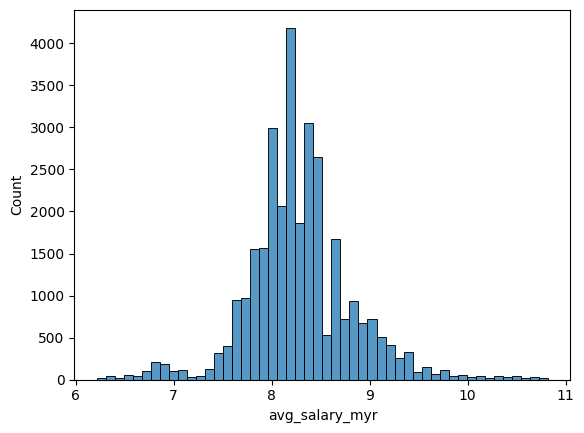

In [14]:
df_clean4 = df_clean3.copy()
df_clean4 = df_clean4[
    (df_clean4['avg_salary_myr'] >= 500) &
    (df_clean4['avg_salary_myr'] <= 50000)
]
df_clean4 = df_clean4[~(
    (df_clean4['experience'] <= 1) & (df_clean4['avg_salary_myr'] > 10000)
)]
df_clean4['log_salary'] = np.log1p(df_clean4['avg_salary_myr'])
sns.histplot(np.log1p(df_clean4['avg_salary_myr']), bins=50)


<Axes: xlabel='experience', ylabel='avg_salary_myr'>

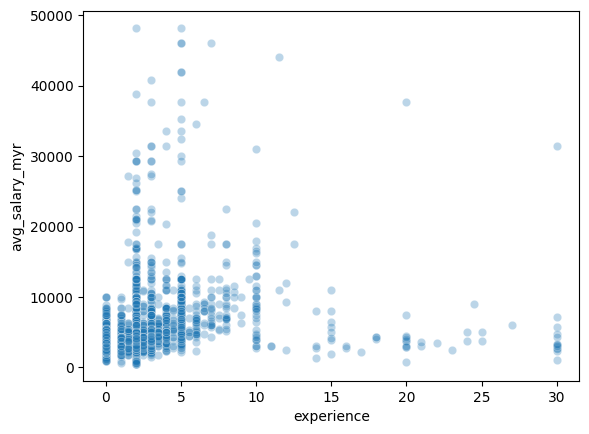

In [15]:
sns.scatterplot(
    x='experience',
    y='avg_salary_myr',
    data=df_clean4.sample(5000),
    alpha=0.3
)

In [16]:
def experience_bucket(x):
    if x < 1:
        return "Intern/<1"
    elif x <= 3:
        return "1-3"
    elif x <= 5:
        return "4-5"
    elif x <= 10:
        return "6-10"
    else:
        return "10+"

df_clean4["experience_bucket"] = df_clean4["experience"].apply(experience_bucket)


MODEL BUILDING (BASELINE)

In [17]:
# Select Features & 

FEATURES = [
    'job_title_normalized',
    'category_clean',
    'experience_bucket',
    'state_region'
]

TARGET = 'avg_salary_myr'

# Prepare X and y
# Train Test Split
from sklearn.model_selection import train_test_split

X = df_clean4[FEATURES]
y = df_clean4['log_salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

(24956, 4) (6239, 4)


In [18]:
df_clean4.groupby('experience_bucket')['avg_salary_myr'].median().head(10)

experience_bucket
1-3          3750.0
10+          4000.0
4-5          5750.0
6-10         8500.0
Intern/<1    3400.0
Name: avg_salary_myr, dtype: float64

In [19]:
df_clean4.groupby('category_clean')['avg_salary_myr'].median().sort_values()

category_clean
Administration And Office Support            2850.0
Hospitality And Tourism                      3000.0
Trades And Services                          3000.0
Farming, Animals And Conservation            3175.0
Education And Training                       3250.0
Sport And Recreation                         3450.0
Government And Defence                       3500.0
Call Centre And Customer Service             3500.0
Science And Technology                       3500.0
Manufacturing, Transport And Logistics       3500.0
Healthcare And Medical                       3550.0
Retail And Consumer Products                 3750.0
Accounting                                   3750.0
Marketing And Communications                 3750.0
Insurance And Superannuation                 3750.0
Advertising, Arts And Media                  3750.0
Mining, Resources And Energy                 3850.0
Legal                                        4000.0
Design And Architecture                      4000

In [20]:
# Build Preprocessing Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessor = ColumnTransformer(
    transformers=[
        ('job_title', TfidfVectorizer(
            max_features=300,
            ngram_range=(1, 2)
        ), 'job_title_normalized'),

        ("category", OneHotEncoder(handle_unknown="ignore"), ["category_clean"]),
        ("experience", OneHotEncoder(handle_unknown="ignore"), ["experience_bucket"]),
        ("state", OneHotEncoder(handle_unknown="ignore"), ["state_region"]),
    ]
)

# Model 1: Linear Regression (Baseline)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_model

# Train
lr_model.fit(X_train, y_train)

# Evaluate Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)

# Convert error back to MYR
print("Approx MAE in MYR:",
      np.expm1(mae_lr))

# Model 2: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Approx MAE in MYR:",
      np.expm1(mae_rf))

Linear Regression RMSE: 0.44185628980480696
Linear Regression MAE: 0.3033071253784398
Approx MAE in MYR: 0.3543303497957595
Random Forest RMSE: 0.445441559067995
Random Forest MAE: 0.3033686128690435
Approx MAE in MYR: 0.35441362673063553


In [21]:
baseline_pred = y_train.mean()
baseline_mae = mean_absolute_error(y_test, np.full_like(y_test, baseline_pred))
print("Baseline MAE (mean predictor):", baseline_mae)

Baseline MAE (mean predictor): 0.39600434307180815


In [22]:
gb_preprocessor = ColumnTransformer(
    transformers=[
        ('job_title', TfidfVectorizer(
            max_features=200,
            ngram_range=(1, 2)
        ), 'job_title_normalized'),

        ('category', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        ), ['category_clean']),

        ('state', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        ), ['state_region']),

        ("experience", OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False
        ), ["experience_bucket"]),
    ],
    sparse_threshold=0
)

# Model 3: Gradient Boosting Regressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocess', gb_preprocessor),
    ('model', HistGradientBoostingRegressor(
        max_depth=8,
        learning_rate=0.05,
        max_iter=300,
        random_state=42
    ))
])

# Train
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting MAE:", mae_gb)


Gradient Boosting RMSE: 0.4387683851728679
Gradient Boosting MAE: 0.29852954562416273


In [23]:
import joblib

# Compute MAE in MYR
mae_lr_myr = mean_absolute_error(
    np.expm1(y_test),
    np.expm1(y_pred_lr)
)

mae_rf_myr = mean_absolute_error(
    np.expm1(y_test),
    np.expm1(y_pred_rf)
)

mae_gb_myr = mean_absolute_error(
    np.expm1(y_test),
    np.expm1(y_pred_gb)
)

print("LR MAE (MYR):", mae_lr_myr)
print("RF MAE (MYR):", mae_rf_myr)
print("GB MAE (MYR):", mae_gb_myr)


# Store models and their MAE
model_scores = {
    'Linear Regression': (lr_model, mae_lr_myr),
    'Random Forest': (rf_model, mae_rf_myr),
    'Gradient Boosting': (gb_model, mae_gb_myr)
}

# Select best model (lowest MAE)
best_model_name, (best_model, best_mae) = min(
    model_scores.items(),
    key=lambda x: x[1][1]
)

print(f"Best Model: {best_model_name}")
print(f"Best MAE (MYR): {best_mae:.2f}")

# Save best model
joblib.dump(best_model, 'salary_prediction_model.pkl')

print("Saved best model as salary_prediction_model.pkl")


LR MAE (MYR): 1568.9013681003257
RF MAE (MYR): 1573.4893622121997
GB MAE (MYR): 1542.1492350072667
Best Model: Gradient Boosting
Best MAE (MYR): 1542.15
Saved best model as salary_prediction_model.pkl


Define Parameter Grid and Randomized Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
import joblib
import numpy as np

# Define hyperparameter grid
param_grid = {
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_iter': [100, 200, 300],
    'model__min_samples_leaf': [20, 50, 100]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,                     # your existing GB pipeline
    param_distributions=param_grid,
    n_iter=10,                               # number of random combinations
    scoring='neg_mean_absolute_error',       # optimize MAE
    cv=3,                                    # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [25]:
# Run hyperparameter tuning
random_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'model__min_samples_leaf': 20, 'model__max_iter': 300, 'model__max_depth': 7, 'model__learning_rate': 0.2}


Evaluate Tuned Model

In [26]:
# Get best estimator
best_model = random_search.best_estimator_

# Predictions
y_pred_best = best_model.predict(X_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Convert to MYR
mae_best_myr = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_best))

print(f"Tuned Gradient Boosting MAE (log): {mae_best:.4f}")
print(f"Tuned Gradient Boosting RMSE (log): {rmse_best:.4f}")
print(f"Tuned Gradient Boosting MAE (MYR): {mae_best_myr:.2f}")


Tuned Gradient Boosting MAE (log): 0.2987
Tuned Gradient Boosting RMSE (log): 0.4391
Tuned Gradient Boosting MAE (MYR): 1542.98


Save Tuned Model

In [27]:
joblib.dump(best_model, 'salary_prediction_model_tuned.pkl')
print("Tuned model saved as salary_prediction_model_tuned.pkl")


Tuned model saved as salary_prediction_model_tuned.pkl


# Web App Design & Build
Update Prediction Function (Tuned Model)

In [28]:
import pandas as pd
import joblib
import numpy as np

# Load the tuned model
best_model = joblib.load('salary_prediction_model_tuned.pkl')

def predict_salary(job_title, category, experience, state):
    """
    Predict salary in MYR for a given job.
    """
    exp_bucket = experience_bucket(experience)
    sample = pd.DataFrame([{
        'job_title_normalized': job_title,
        'category_clean': category,
        "experience_bucket": exp_bucket,
        'state_region': state
    }])
    
    log_salary_pred = best_model.predict(sample)[0]
    salary_myr = np.expm1(log_salary_pred)
    return round(salary_myr, 2)

def predict_salary_range(job_title, category, experience, state, pct=0.15):
    """
    Returns salary range (±pct%) around predicted salary.
    """
    salary = predict_salary(job_title, category, experience, state)
    low = salary * (1 - pct)
    high = salary * (1 + pct)
    return round(low, 2), round(high, 2)


In [30]:
df_clean4[[
    'job_title_normalized',
    'category_clean',
    'experience_bucket',
    'state_region',
    'avg_salary_myr'
]].drop_duplicates().to_csv(
    'ui_reference_data.csv',
    index=False
)